## **Carateristicas de las señales**

Vamos a obtener 3 carateristicas de las señales, las cuales son 7 en total:



1.   GSR 
2.   BLOOD VOLUMEN PRESSURE 
3.   RESPIRATION PATTERN 
4.   SKIN TEMPERATURE 
5.   EMG 
6.   EOG 
7.   EEG



In [1]:
# Librerias
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import librosa
import scipy.signal
import scipy.integrate as integrate
import pandas as pd


- Vamos a cargar la base de datos que se encuentra en Google Drive.

In [2]:
# PARA DANIEL GONZALEZ CARGA de DATOS

from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/My Drive/Datos_señalesIIi/' #ruta de la base de datos
fileName = 's17.mat' #nombre de la base de datos
db = sio.loadmat(ruta+fileName) #variable donde guardaremos la base de datos


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# PARA JULIAN ZAPATA CARGA de DATOS

#fileName = 's17.mat'
#db = sio.loadmat(fileName)

In [4]:
X = db['data'] #Guardar en X los datos 
print('forma de la matriz: '+str(X.shape)) #miramos el tamaño y las dimensiones de la base de datos

print('Videos: ' +str(X.shape[0]))
print('Canales: ' +str(X.shape[1]))
print('Muestras de la señal: ' +str(X.shape[2]))

forma de la matriz: (40, 40, 6528)
Videos: 40
Canales: 40
Muestras de la señal: 6528


# **GSR** 

La respuesta galvánica de la piel (GSR), también denominada actividad electrodérmica (EDA) y conductancia de la piel (SC), es la medida de las continuas variaciones en las características eléctricas de la piel, por ejemplo la conductancia, causada por la variación de la sudoración del cuerpo humano.

Referencia: https://www.brainsigns.com/es/science/s2/technologies/gsr
Copyright © BrainSigns

# Graficamos las 40 señales 

La señal GSR esta en el canal 37.

In [5]:
#funcion para graficar las 40 señales
def graficar_señales(canal):
  canal=canal-1 #le resto uno al canal porque python crea listas con la primera ubicacion igual a 0
  
  for video in range(40): #ciclo que recorre todos los videos

    señal = X[video,canal,:] #variable de la señal (GSR)
    ts = len(señal)/128. #tiempo de muestreo
    tiempo = np.linspace(0,ts,len(señal)) #tiempo
    
    plt.plot(tiempo,señal) 
    plt.title('Video '+  str(video+1) + ' Canal ' + str(canal+1))
    plt.ylabel('uV')
    plt.xlabel('s')
    plt.grid()
    plt.show()
    


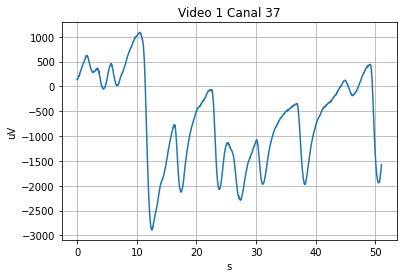

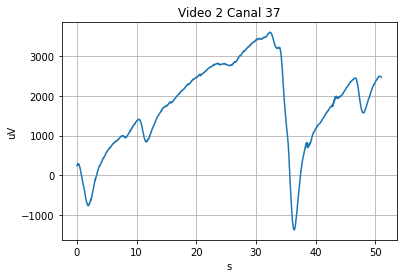

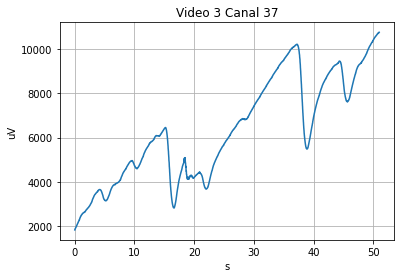

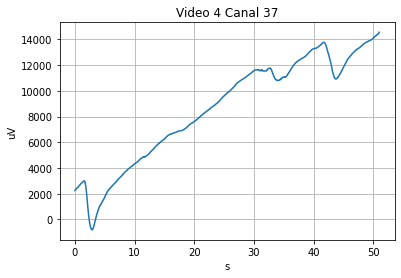

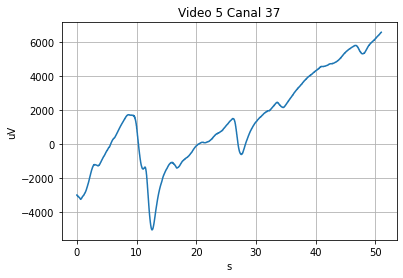

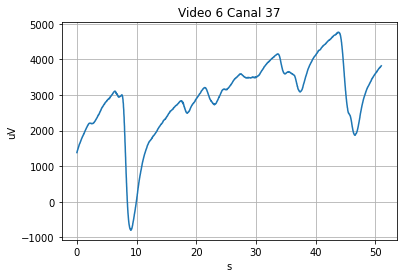

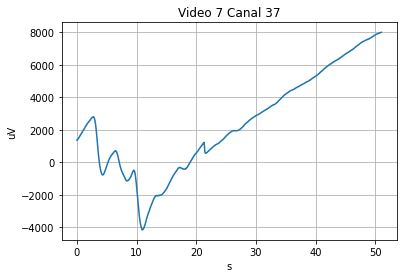

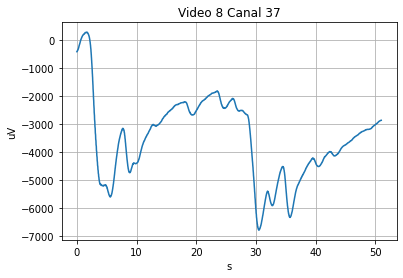

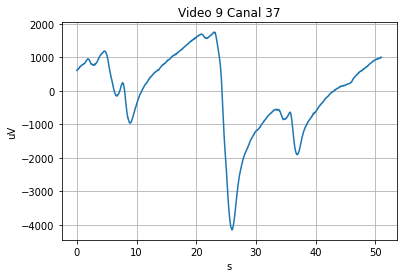

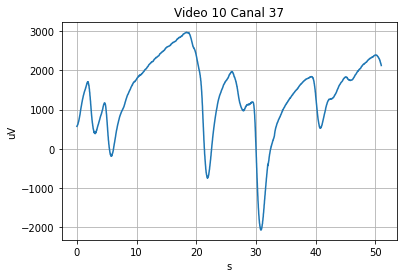

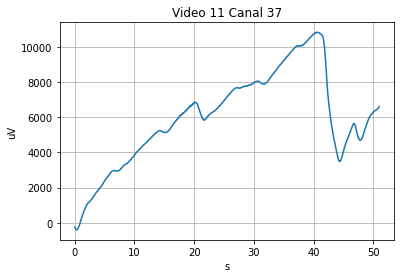

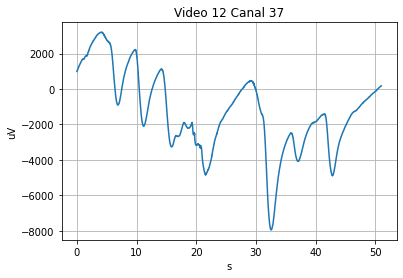

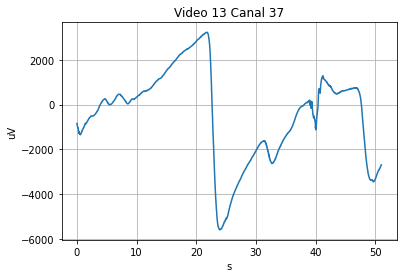

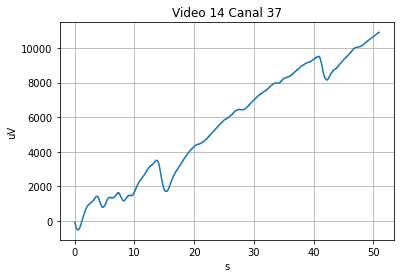

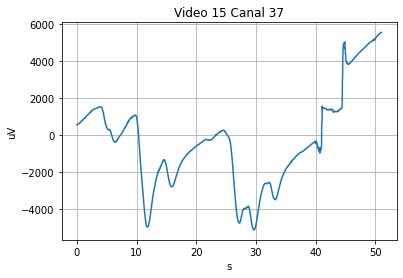

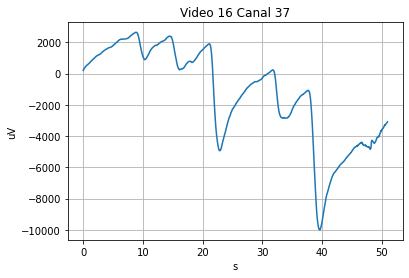

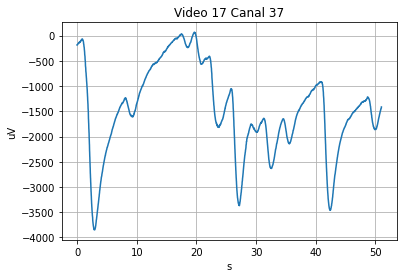

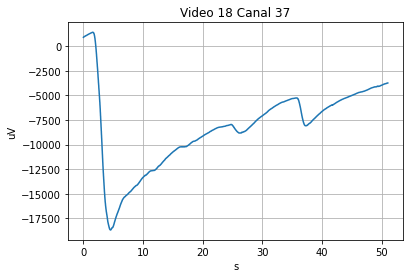

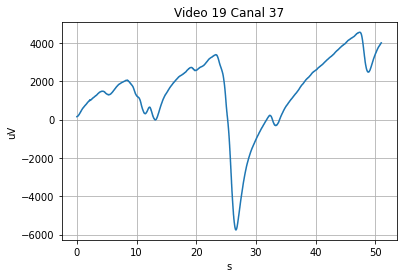

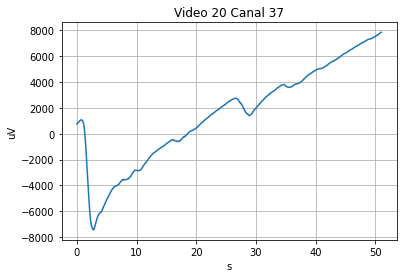

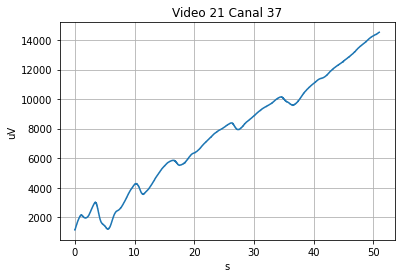

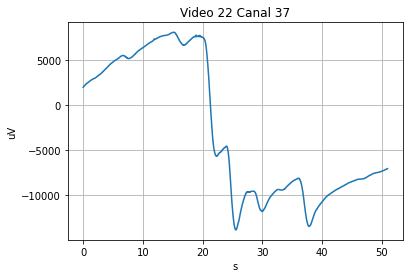

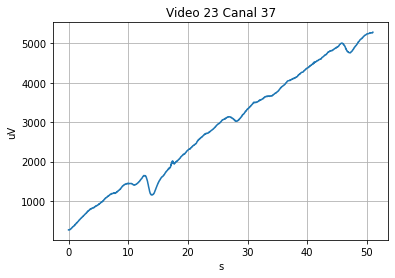

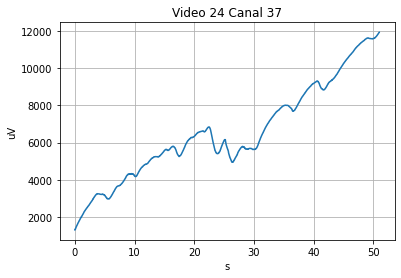

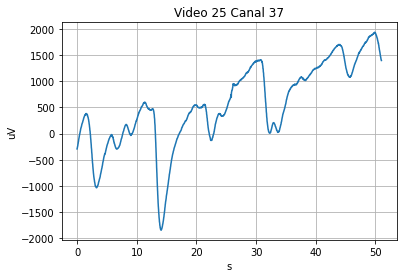

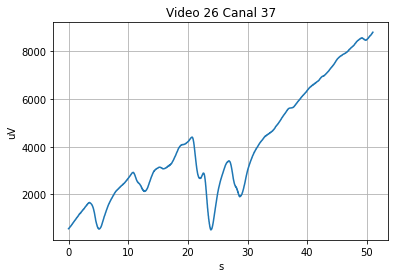

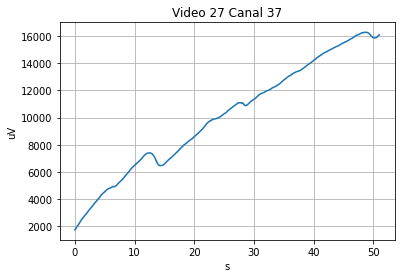

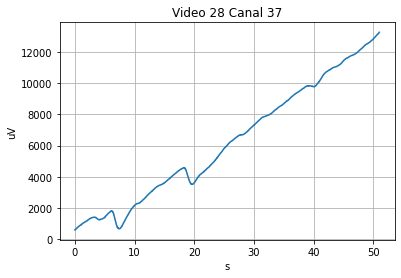

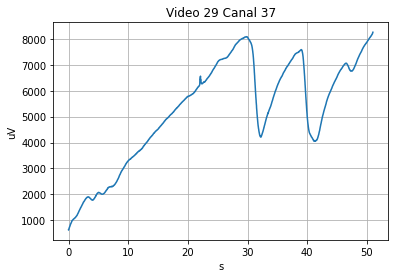

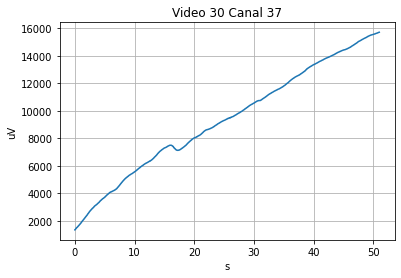

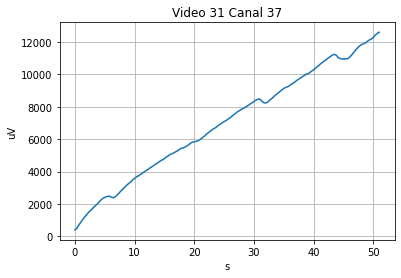

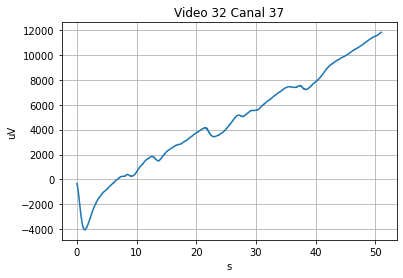

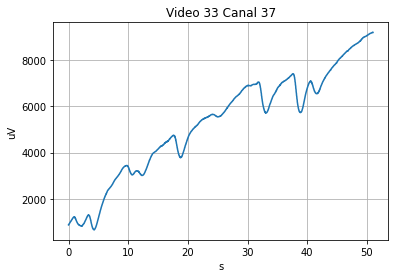

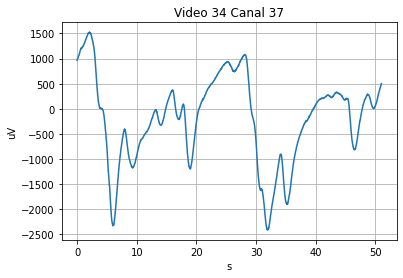

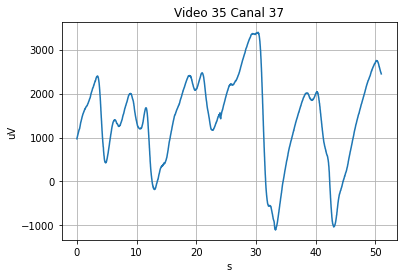

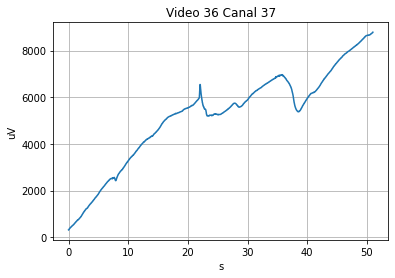

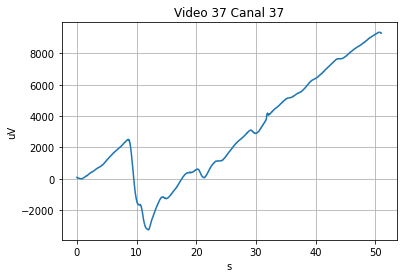

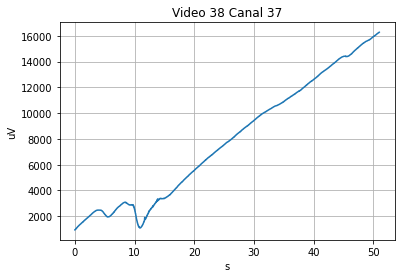

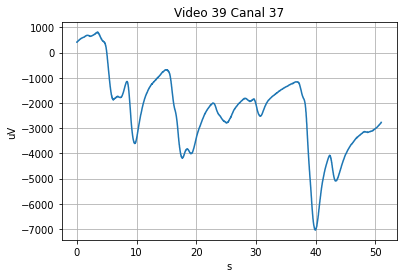

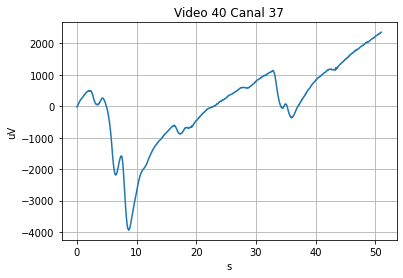

In [6]:
canal_GSR=37 #canal señal GSR
graficar_señales(canal_GSR)

Las caracteristicas más importantes de las señales GSR son:


*   resistencia promedio de la piel
*   promedio de los derivados
*   promedio del derivado para valores negativos solamente (tasa de disminución promedio durante el tiempo de decaimiento)
*   proporción de muestras negativas en el derivado vs. todas las muestras
*   número de mínimos locales en la señal GSR 
*   tiempo medio de aumento de la señal de GSR
*   10 potencias espectrales en las bandas de [0-2,4]Hz

solo vamos a calcular 3 los cuales son: **resistencia promedio de la piel**, **promedio de los derivados** y **numero de mínimos locales en la señal GSR**.

### 1) resistencia promedio de la piel

In [7]:
#funcion que devuelve el promedio de las 40 señales
def promedio_señales(canal):
    
  promedio_señal=[] #lista para guardar los promedios 

  for video in range(40): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal GSR
    promedio_señal.append(np.mean(señal))# calculo del promedio de la señal
  
  return(promedio_señal)

In [8]:
promedio_GSR=[]
promedio_GSR=promedio_señales(canal_GSR)

print('Promedio de la resistencia de la piel: '+'\n')

for i in range(40):
  print('Video'+str(i+1)+': '+str(promedio_GSR[i]))

Promedio de la resistencia de la piel: 

Video1: -674.1595272748897
Video2: 1735.8361033493647
Video3: 6349.812806984382
Video4: 8631.950849587727
Video5: 1366.02438254009
Video6: 2933.2735958431904
Video7: 2381.5558997350054
Video8: -3537.25321197874
Video9: -29.33466912525696
Video10: 1387.0363570646784
Video11: 5983.203755739719
Video12: -1290.0401701852222
Video13: -439.65820622537643
Video14: 5560.670488273485
Video15: -327.8920992539069
Video16: -1328.667518670262
Video17: -1460.5234656934365
Video18: -8277.331329026807
Video19: 1458.7403314177943
Video20: 1479.2144276599706
Video21: 7678.021090908
Video22: -2856.332033375716
Video23: 2861.8931753411707
Video24: 6562.218388344914
Video25: 553.7634198767146
Video26: 4020.3371593415445
Video27: 10118.613399482083
Video28: 6244.86790793691
Video29: 5244.134935021332
Video30: 9367.039939901628
Video31: 6983.57211019065
Video32: 4621.668684377766
Video33: 5264.139247167675
Video34: -201.37678133392546
Video35: 1403.4920076177941
Video

### 2) Promedio de la derivada.

In [9]:
#funcion que devuelve el promedio derivado de las 40 señales
def promedioDiff_señales(canal):
    
  promedioDiff_señal=[] #lista para guardar los promedios 
  
  for video in range(40): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal 
    promedioDiff_señal.append(np.mean(np.diff(señal)))# calculo del promedio de la señal
  
  return(promedioDiff_señal)

In [10]:
#calculo del promedio derivado

promedioDiff_GSR=[]
promedioDiff_GSR=promedioDiff_señales(canal_GSR)

print('Promedio de la derivada: '+'\n')
for i in range(40):
  print('Video'+str(i+1)+': '+str(promedioDiff_GSR[i]))

Promedio de la derivada: 

Video1: -0.262750437627014
Video2: 0.33994005835113866
Video3: 1.3717290287630775
Video4: 1.8853779629552658
Video5: 1.4664677127750567
Video6: 0.3734257027337028
Video7: 1.0179924051398197
Video8: -0.3747079803879879
Video9: 0.0593662269036031
Video10: 0.23733029397510913
Video11: 1.0535734372360082
Video12: -0.12466942943816162
Video13: -0.2824114046190585
Video14: 1.6827851070832198
Video15: 0.7674076106477022
Video16: -0.5031501890189091
Video17: -0.188179368654143
Video18: -0.7119754624194174
Video19: 0.5907812429019987
Video20: 1.0859447103088726
Video21: 2.050398407338866
Video22: -1.3868958075379292
Video23: 0.7675448633939342
Video24: 1.6283157525798142
Video25: 0.25843346409891954
Video26: 1.2605081789966284
Video27: 2.20642727199952
Video28: 1.9392517078689684
Video29: 1.1674043572758501
Video30: 2.2024105465663575
Video31: 1.8698941856201214
Video32: 1.8606214759162156
Video33: 1.273340695095821
Video34: -0.07130194793546459
Video35: 0.22635912764

### 3) numero de mínimos locales.

In [11]:
#funcion para numeros calcular los minimos locales
def minimos_locales(señal): #definicion de la función
  ts = len(señal)/128. #tiempo de muestreo
  tiempo = np.linspace(0,ts,len(señal)) #tiempo
  sort_idx = np.argsort(tiempo)
  y=señal[sort_idx] #ordenar la señal
  x=tiempo[sort_idx] #ordenar el tiempo
  minm=np.array([],dtype=int) #arreglo para guardar la posicion de los minimos
  length = y.size #tamaño de la señal
  i=0 #guardian de ciclo
  while i < length-1: 
        if i < length - 1:
            while i < length-1 and y[i+1] <= y[i]:
                i+=1
            if i < length-1:
                minm = np.append(minm,i)
            i+=1
  min=[] #lista
  min=minm #guardar arreglo de las posiciones de los valores minimos en una lista
  v_min=[] #lista para guardar el valor minimo



  for i in range(len(min)-1): #ciclo para guardar el valor minimo con la posicion que obtuvimos antes
    v_min.append(GSR[min[i]]) #guardar el valor

  p=0 #posicion
  minm_local=[] #variable para reducir la cantidad de numeros minimos que arroja
  for i in range(len(v_min)-1): #ciclo que recorre toda la lista de valores minimos 
    if (np.abs(v_min[i]-v_min[p])>30): #condicion que pregunta si la diferencia de un valor al siguiente
      minm_local.append(v_min[p]) #guarda un solo valor
      p=i #actualizar nuevo valor minimo

  final=[] #lista final para guardar la cantidad y los valores minimos locales
  for i in range(len(minm_local)-2): #ciclo que recorre la lsita reducidad
    if (minm_local[i+1]<minm_local[i] and minm_local[i+1]<minm_local[i+2]): #condicion que pregunta de esos valores reducidos cual es un minimo local
      final.append(minm_local[i+1]) #agregar esos minimos locales a la lista final

  for i in range(len(final)-1): #ciclo que busca las posiciones de los minimos locales
  #esto se hace para corroborar que efectivamente esos valores si sean minimos
    np.where(GSR==final[i]) #buscar el valor final[i] en la señal y devuelve la posicion

  return(len(final)) #retorna la cantidad de minimos locales

In [12]:
print('Minimos locales:'+'\n')
minimos_locales_GSR =[]
for video in range(40): #ciclo para tomar todos los videos
  GSR = X[video,canal_GSR-1,:] #variable de la señal GSR en le video especifico
  minimos_locales_GSR.append(minimos_locales(GSR)) #calcular la cantidad de minimos locales
  
  print('VIDEO '+str(video+1)+': '+str(minimos_locales_GSR[video]))

Minimos locales:

VIDEO 1: 11
VIDEO 2: 6
VIDEO 3: 8
VIDEO 4: 5
VIDEO 5: 8
VIDEO 6: 8
VIDEO 7: 5
VIDEO 8: 10
VIDEO 9: 7
VIDEO 10: 7
VIDEO 11: 5
VIDEO 12: 11
VIDEO 13: 11
VIDEO 14: 4
VIDEO 15: 11
VIDEO 16: 8
VIDEO 17: 11
VIDEO 18: 3
VIDEO 19: 7
VIDEO 20: 4
VIDEO 21: 6
VIDEO 22: 8
VIDEO 23: 5
VIDEO 24: 12
VIDEO 25: 11
VIDEO 26: 7
VIDEO 27: 3
VIDEO 28: 4
VIDEO 29: 6
VIDEO 30: 1
VIDEO 31: 3
VIDEO 32: 6
VIDEO 33: 9
VIDEO 34: 12
VIDEO 35: 10
VIDEO 36: 4
VIDEO 37: 6
VIDEO 38: 2
VIDEO 39: 11
VIDEO 40: 6


# **Blood volume pressure** 

La pletismografía incluye aquellas técnicas que miden cambios de volumen
como consecuencia de variaciones del flujo sanguíneo. No son métodos
específicos de un solo vaso arterial sino que miden cambios de volumen en
un segmento de la extremidad. 

Referencia: http://www.cdvni.org/certificacion/guia5pletismografia.pdf

# Graficamos las 40 señales 

La señal BVP esta en el canal 39.

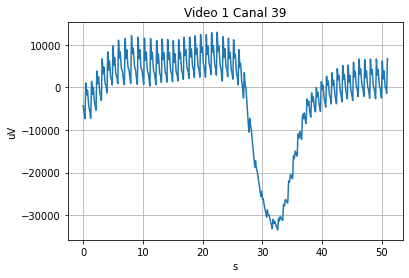

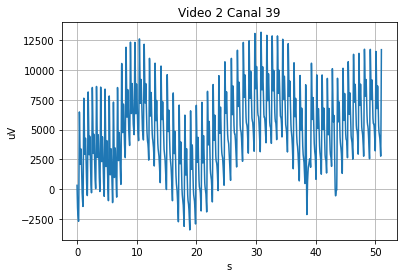

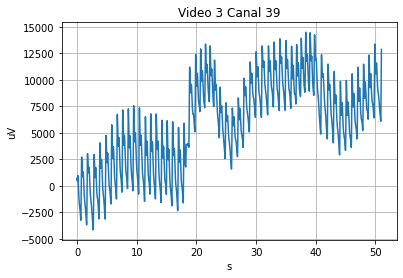

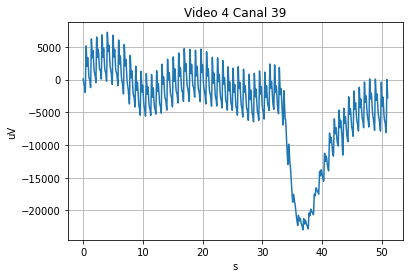

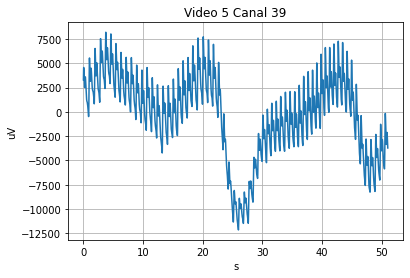

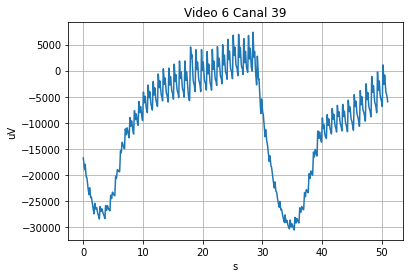

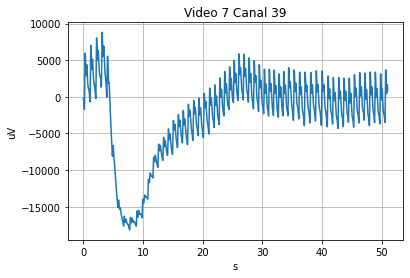

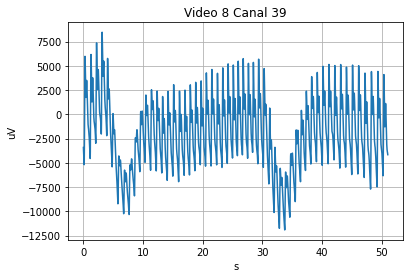

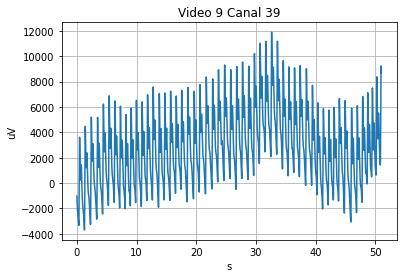

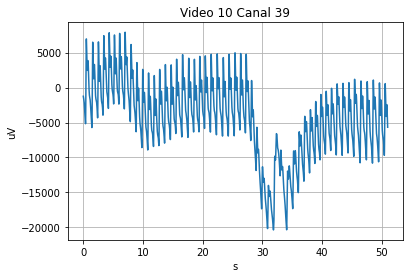

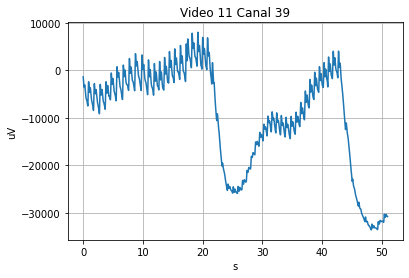

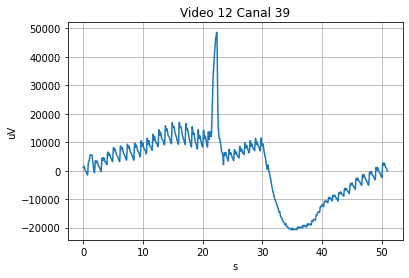

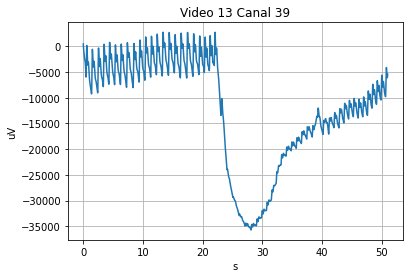

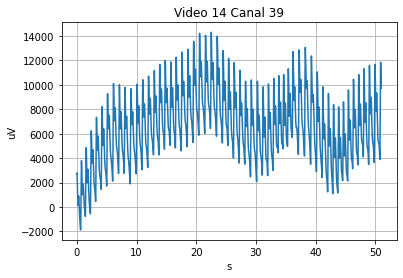

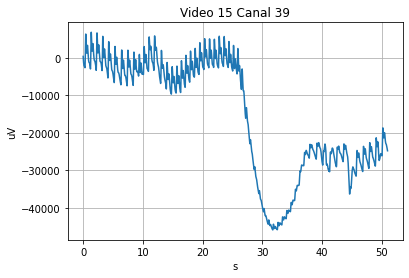

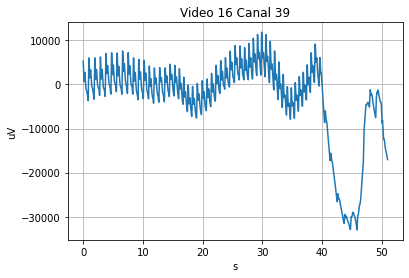

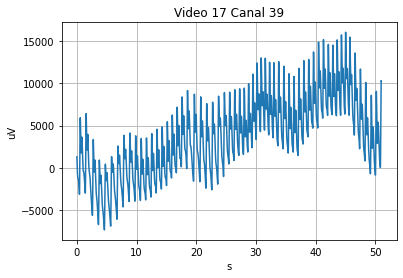

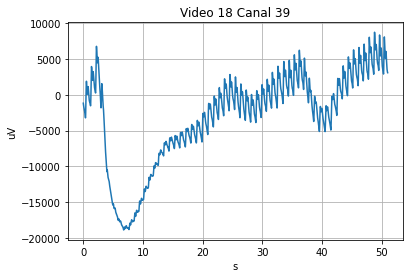

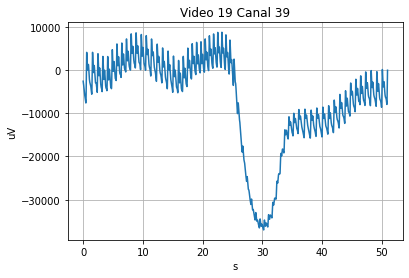

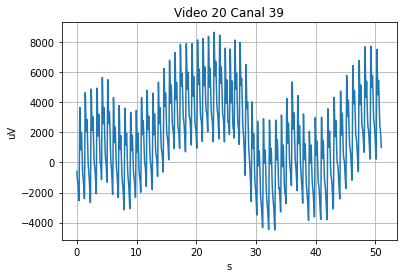

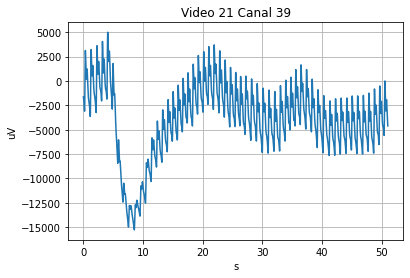

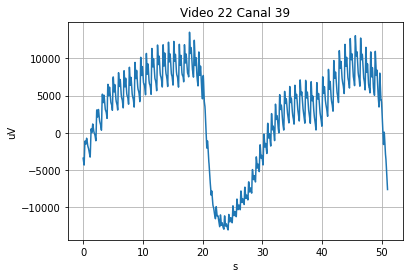

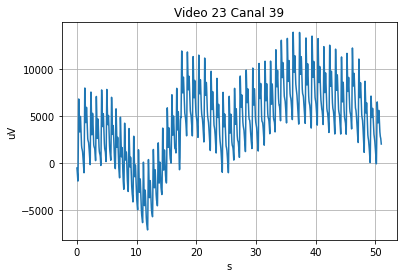

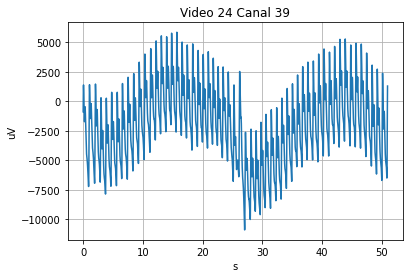

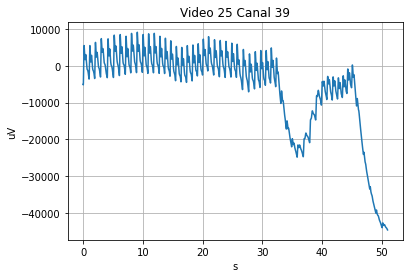

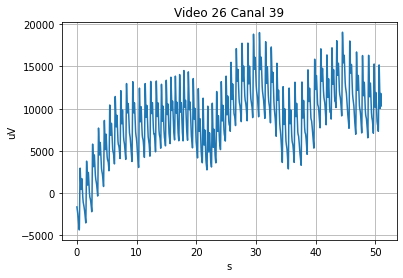

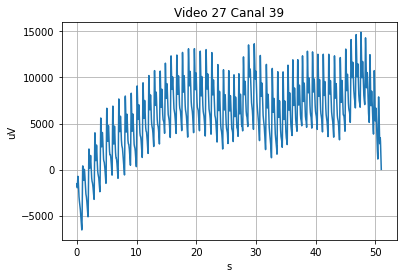

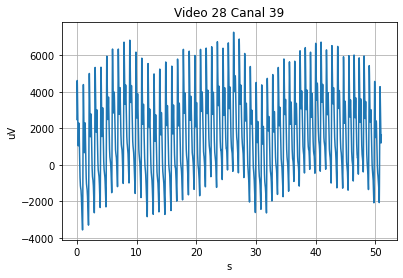

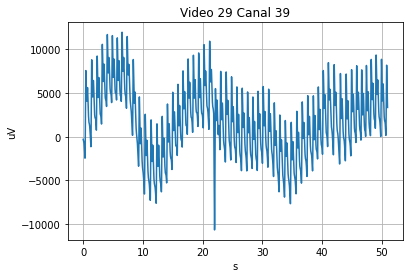

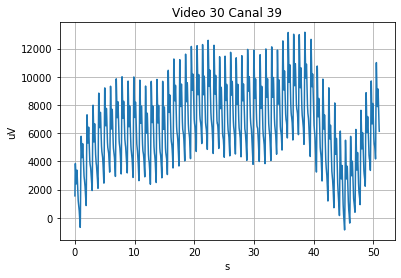

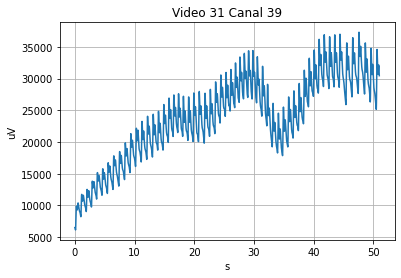

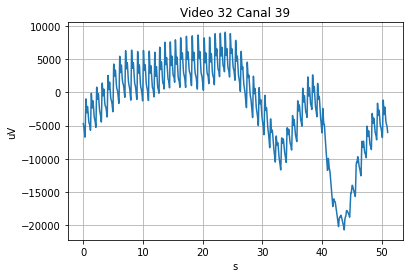

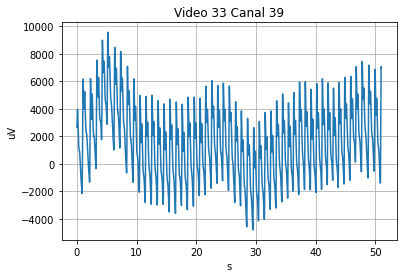

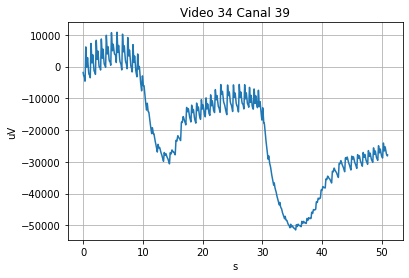

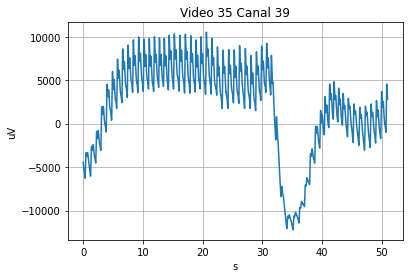

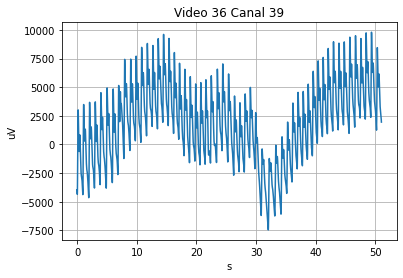

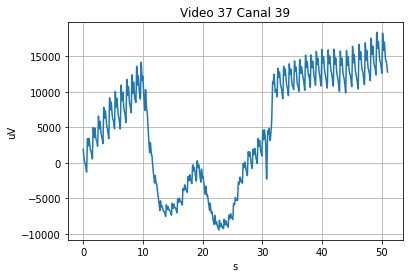

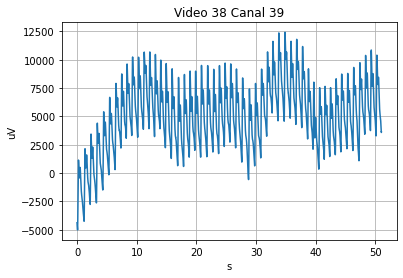

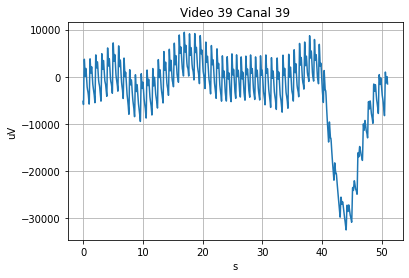

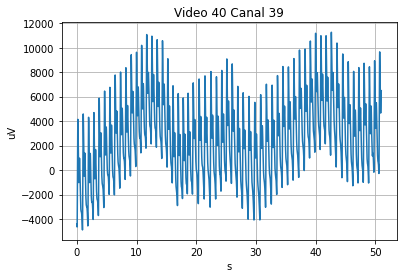

In [13]:
canal_BVP=39
graficar_señales(canal_BVP)

Las caracteristicas más importantes de las señales BVP son:


*   El promedio y la desviación estándar de la HR, HRV, e intervalos de latidos.


+   relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz.

*   potencia espectral en las bandas ([0,1-0,2]Hz, [0,2-0,3]Hz, [0,3-0,4]Hz), componentes de baja frecuencia [0,01-0,08]Hz, media frecuencia [0,08-0,15]Hz y alta frecuencia [0,15-0,5]Hz del espectro de potencia de la HRV.

solo vamos a calcular 3 los cuales son: **El promedio HR**, **La desviación estándar de HR**, y **relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz.**

### 1) Promedio HR

In [14]:
#promedio_señales(canal_BVP)

promedio_BVP=[]

promedio_BVP=promedio_señales(canal_BVP)

print('Promedio HR'+'\n')

for i in range(40):
  print('Video'+str(i+1)+': '+str(promedio_BVP[i]))

Promedio HR

Video1: -1668.324413381304
Video2: 4934.723291846259
Video3: 5993.601785009276
Video4: -4088.6126625549155
Video5: -280.714069228335
Video6: -10082.956133116219
Video7: -2633.2312872650136
Video8: -1952.7906665262483
Video9: 2848.8931908078316
Video10: -4272.9464295842545
Video11: -9463.337542282974
Video12: 1510.989316870294
Video13: -12108.44941140689
Video14: 6560.348876972987
Video15: -15222.014168530157
Video16: -3082.213583180358
Video17: 3758.1728255241774
Video18: -2999.981030122176
Video19: -7020.491311500288
Video20: 1714.6045147531524
Video21: -3920.729415248318
Video22: 2826.1051340920185
Video23: 4365.084628507396
Video24: -1979.9451388805137
Video25: -5669.727016985431
Video26: 8945.311322458942
Video27: 6040.614745905032
Video28: 1719.6630256329036
Video29: 1690.577523034953
Video30: 6437.571644903706
Video31: 23900.84758077677
Video32: -2018.6231877346358
Video33: 1627.1970669185855
Video34: -20615.917708241603
Video35: 2074.102478735202
Video36: 1958.31942

### 2) Desviacion estandar HR

In [15]:
#definicion de la funcion para calcular la desviacion estandar
def Desviacion_estandar(canal):
    
  std_señal=[] #lista para guardar la desviacion estandar
  
  for video in range(40): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal 
    std_señal.append(np.std(señal))# calculo de la desviacion estandar de la señal
  
  return(std_señal)

In [16]:
std_BVP=[]
std_BVP=Desviacion_estandar(canal_BVP)
print('Desviacion estandar HR'+'\n')
for i in range(40):
  print('Video '+str(i+1)+': '+str(std_BVP[i]))

Desviacion estandar HR

Video 1: 11183.749355464703
Video 2: 3224.3693805215757
Video 3: 4166.8242169821015
Video 4: 6518.678526390171
Video 5: 4239.9439264052335
Video 6: 10105.726432216183
Video 7: 5706.719050682077
Video 8: 3528.7392790567
Video 9: 2802.911570215838
Video 10: 5329.3328321933095
Video 11: 10956.183851882499
Video 12: 11588.12579168788
Video 13: 10644.131134677524
Video 14: 2827.3537388858954
Video 15: 15412.839216516822
Video 16: 9499.609165175078
Video 17: 4527.3833953475105
Video 18: 6569.058809072046
Video 19: 11023.016406722523
Video 20: 2666.2587645414806
Video 21: 3671.0558010149375
Video 22: 6538.068820221036
Video 23: 3939.831894860232
Video 24: 3113.2786284127437
Video 25: 11849.461419485759
Video 26: 4076.117811028975
Video 27: 3612.0179934884245
Video 28: 2176.6656248769086
Video 29: 3846.15539448835
Video 30: 2683.347394409421
Video 31: 6578.642838022705
Video 32: 6614.907241613097
Video 33: 2590.3728642480933
Video 34: 16318.57853011736
Video 35: 5214.69

### 3) relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz.

In [17]:

def relacion_energia(canal):
  fil_band1=[0.04,0.15] #banda 1
  fil_band2=[0.15,0.5] #banda 2
  r_energia=[]
  for video in range (40):
    señal = X[video,canal-1,:] #señal
    ts = len(señal)/128. #tiempo de muestreo
    time = np.linspace(0,ts,len(señal)) #tiemppo


    sos1 = scipy.signal.butter(5, fil_band1, btype='bandpass',analog=False, fs=128, output='sos') #filtro para la banda 1
    sos2 = scipy.signal.butter(5, fil_band2, btype='bandpass',analog=False, fs=128, output='sos') #filtro para la banda 2

    filtered1 = scipy.signal.sosfilt(sos1, señal) #señal filtrada con la banda 1
    filtered2 = scipy.signal.sosfilt(sos2, señal) #señal filtrada con la banda 2


    cuadrado1 = filtered1**2 # elevo al cuadrado la señal filtrada
    energia1 = integrate.simps(cuadrado1,time) #calculo la energia


    cuadrado2 = filtered2**2 # elevo al cuadrado la señal filtrada
    energia2 = integrate.simps(cuadrado2,time)#calculo la energia

    r_energia.append(energia1/energia2)
  return (r_energia)



In [18]:
R_energy_BVP=[]
R_energy_BVP=relacion_energia(canal_BVP)
print('relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz'+'\n')
for i in range(40):
  print('Video '+str(i+1)+': '+str(R_energy_BVP[i]))

relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz

Video 1: 74.61449458606805
Video 2: 7.139845057045806
Video 3: 12.138689298165923
Video 4: 19.786548123428823
Video 5: 29.91913824553476
Video 6: 17.566152139458122
Video 7: 17.495833850721944
Video 8: 8.13154796161004
Video 9: 1.8060805710069328
Video 10: 4.027837701973577
Video 11: 14.927107700194568
Video 12: 1.200508014093559
Video 13: 18.89618554285891
Video 14: 43.14102673161369
Video 15: 28.834133526817705
Video 16: 7.111119327091757
Video 17: 5.34050311199841
Video 18: 11.39646280312475
Video 19: 54.48047403961773
Video 20: 9.852948601354012
Video 21: 18.37137018033867
Video 22: 17.725863740376084
Video 23: 22.749509592959242
Video 24: 9.88157023885287
Video 25: 10.268634194342837
Video 26: 19.047980780470972
Video 27: 4.286790143433542
Video 28: 9.925443461335155
Video 29: 19.1280865011081
Video 30: 17.323886884348628
Video 31: 10.631145259362066
Video 32: 28.487286959061798
Video 33: 18.097657413

# **RESPIRATION PATTERN**


Los patrones de respiración se refieren a la frecuencia respiratoria, que se define como la frecuencia de las respiraciones durante un período de tiempo, así como la cantidad de aire que se cicla durante la respiración (volumen tidal). Los patrones de respiración son un importante criterio de diagnóstico para muchas enfermedades, incluidas algunas que afectan a algo más que al propio sistema respiratorio.

Referencia: https://med.libretexts.org/Bookshelves/Anatomy_and_Physiology/Book%3A_Anatomy_and_Physiology_(Boundless)/21%3A_Respiratory_System/21.5%3A_Mechanics_of_Breathing/21.5D%3A_Breathing_Patterns#:~:text=Breathing%20patterns%20refer%20to%20the,during%20breathing%20(tidal%20volume).


# Graficamos las 40 señales 

La señal respiration pattern esta en el canal 38.

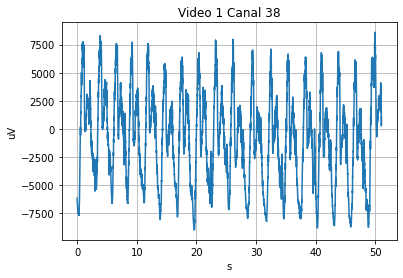

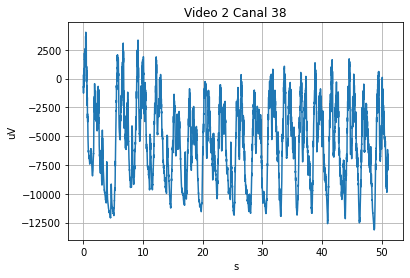

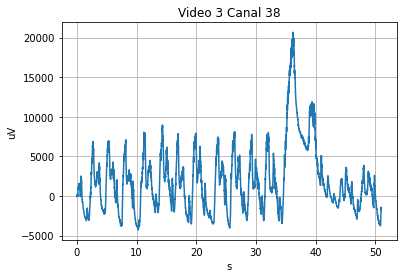

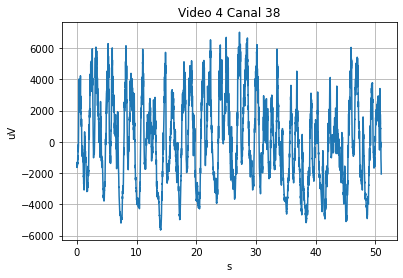

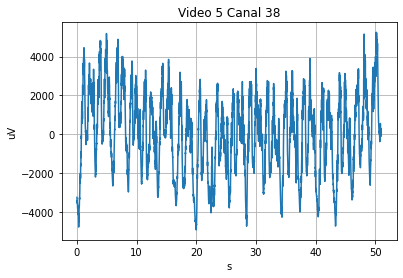

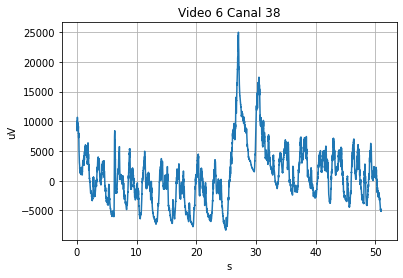

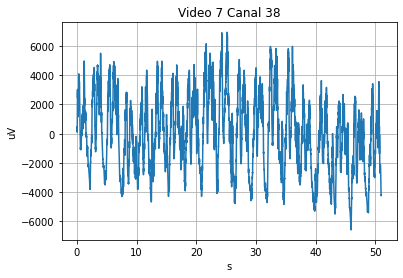

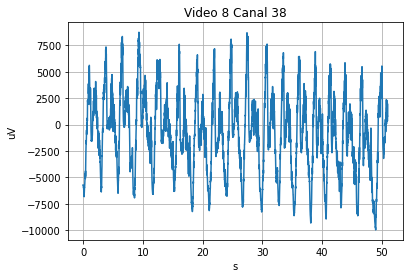

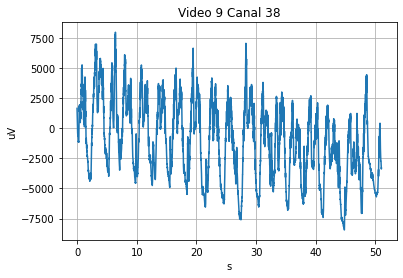

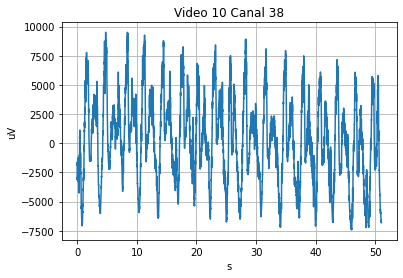

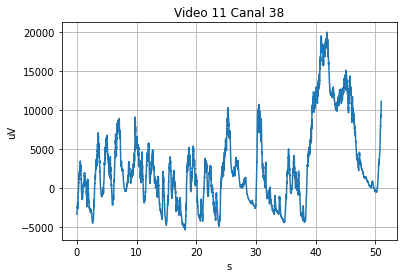

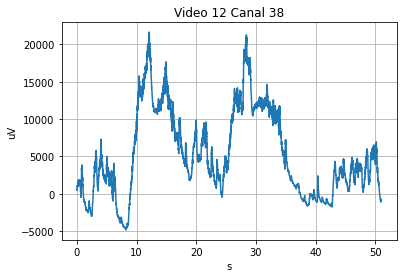

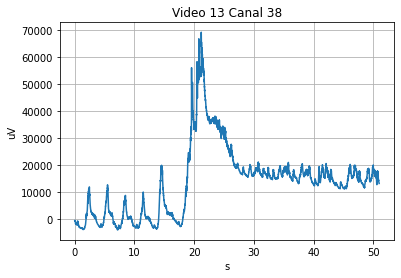

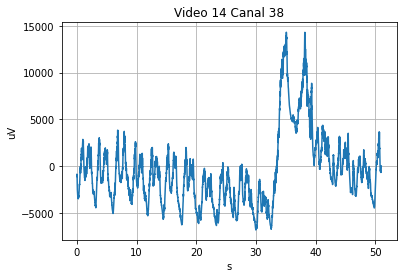

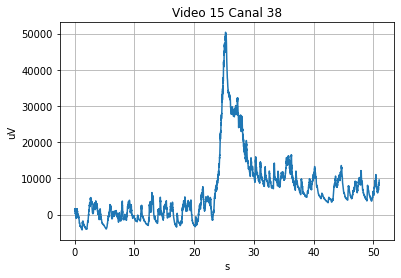

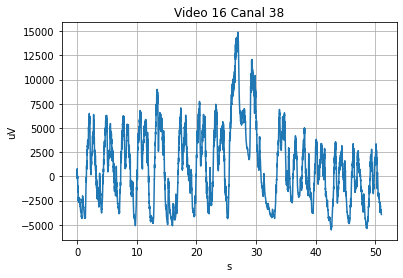

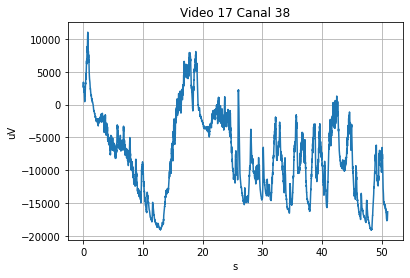

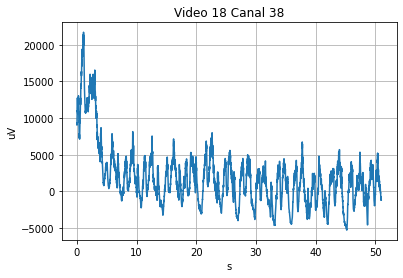

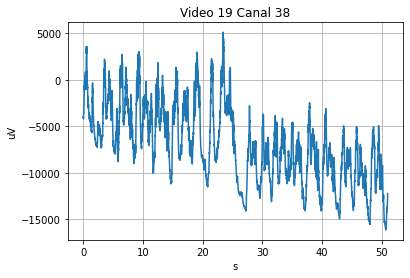

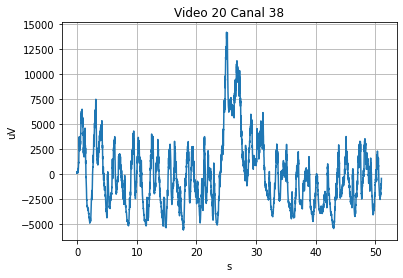

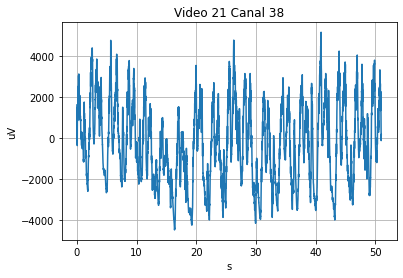

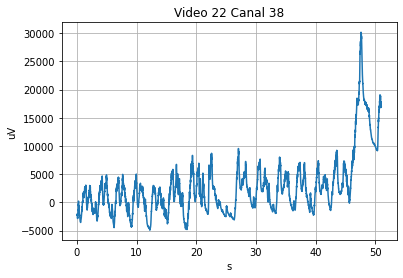

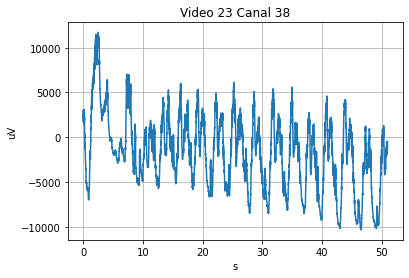

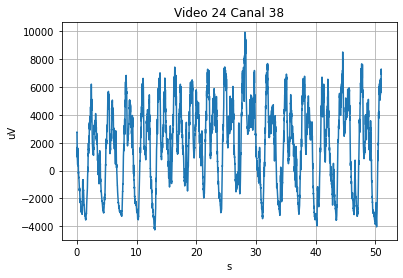

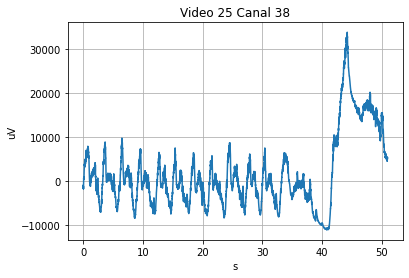

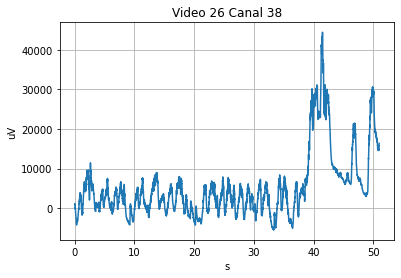

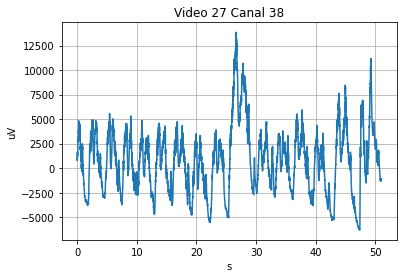

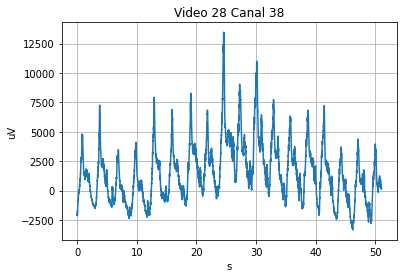

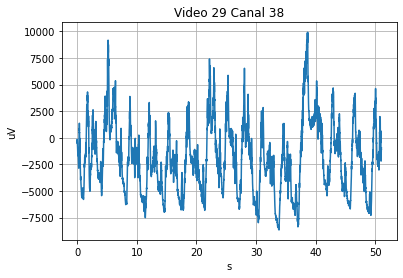

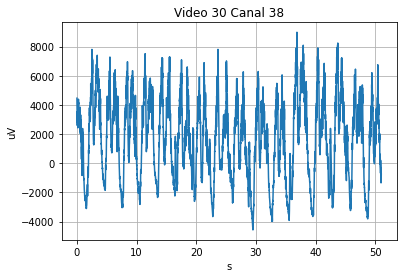

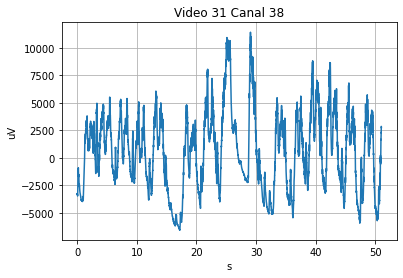

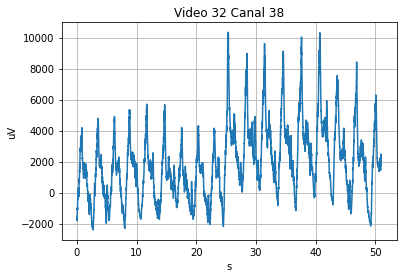

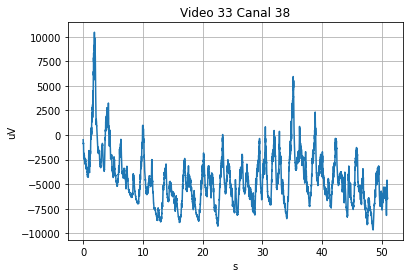

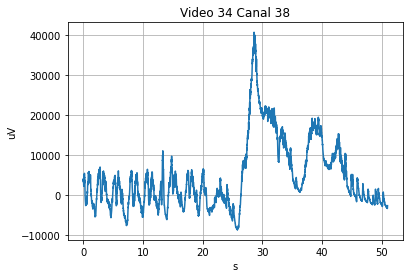

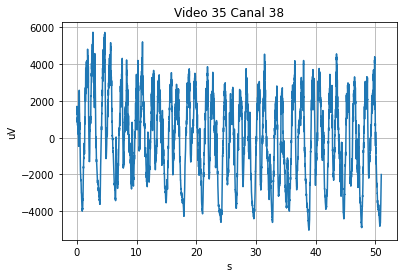

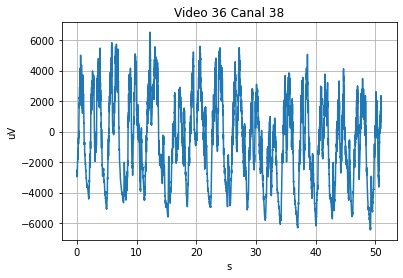

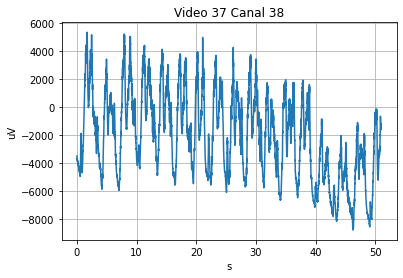

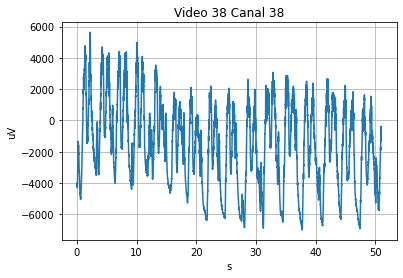

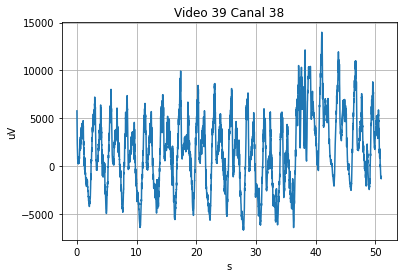

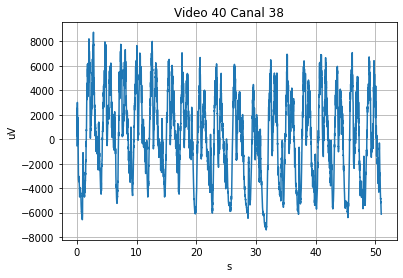

In [19]:
canal_RP=38 #canal de patron de respiración
graficar_señales(canal_RP)

Las caracteristicas más importantes de las señales Respiration pattern son:


*  relación de energía de la banda (diferencia entre el logaritmo de
energía entre la más baja (0,05-0,25Hz) y la más alta (0,25-5Hz).

*  señal de respiración promedio. 

*  media de la derivada (variación de la señal de respiración).

*  desviacion estandar

*  rango o la mayor respiración.

*  ritmo respiratorio (centroide espectral).

*  frecuencia respiratoria.

*  10 potencias espectrales en las bandas de 0 a 2.4Hz. 

*  promedio de pico a pico en el tiempo.

*  mediana pico a pico en el tiempo.


solo vamos a calcular 3 los cuales son: **media de la derivada**, **La desviación estandar**, y **frecuencia respiratoria**.

### 1) media de la derivada.

In [20]:
promedioDiff_RP=[]
promedioDiff_RP=promedioDiff_señales(canal_RP)

print('Promedio de la derivada: '+'\n')
for i in range(40):
  print('Video'+str(i+1)+': '+str(promedioDiff_RP[i]))

Promedio de la derivada: 

Video1: 1.1131002490784327
Video2: -0.8977787149633881
Video3: -0.2260797109579616
Video4: -0.08945038627335021
Video5: 0.5027185440615412
Video6: -2.109632037278139
Video7: -0.6622957733336471
Video8: 0.9970440823350828
Video9: -0.7590427601893763
Video10: -0.7903357926082919
Video11: 2.219535886601307
Video12: -0.18805982563993626
Video13: 2.114644859331781
Video14: 0.13864498665651528
Video15: 1.2263938577272726
Video16: -0.6677873749530618
Video17: -2.9400847697025423
Video18: -1.5982140685065045
Video19: -1.2575576196634315
Video20: -0.08277141133081849
Video21: -0.22136852003075633
Video22: 2.9502444720882437
Video23: -0.5302435812978243
Video24: 0.6406118467997929
Video25: 0.9553950479084997
Video26: 2.352871207873401
Video27: -0.31963802590564344
Video28: 0.34327058527219384
Video29: -0.06919322284549967
Video30: -0.7989250980182585
Video31: 0.9227470693184454
Video32: 0.5887217174613262
Video33: -0.9133007484857457
Video34: -1.0167362858753226
Video3

### 2) Desviacion estandar

In [21]:
std_RP=[]
std_RP=Desviacion_estandar(canal_RP)

print('Desviacion estandar Respiration pattern'+'\n')
for i in range(len(Desviacion_estandar(canal_RP))):
  print('Video '+str(i+1)+': '+str(std_RP[i]))

Desviacion estandar Respiration pattern

Video 1: 4066.8922437883507
Video 2: 3522.9992561374925
Video 3: 4149.637252529751
Video 4: 2710.838977809588
Video 5: 2052.569863042661
Video 6: 4834.019255459567
Video 7: 2573.1904281857824
Video 8: 3757.265716623027
Video 9: 3199.3177418869964
Video 10: 3627.298824053976
Video 11: 5278.435990208116
Video 12: 5740.486828832162
Video 13: 12977.93538710357
Video 14: 3838.719154350438
Video 15: 8934.263276286178
Video 16: 3854.6699229800697
Video 17: 6314.115338734117
Video 18: 4045.0572385240016
Video 19: 4078.147936902841
Video 20: 3312.86035818672
Video 21: 1949.7320959358672
Video 22: 5258.382523891693
Video 23: 4111.70189302778
Video 24: 2986.8297791937543
Video 25: 8192.533836630275
Video 26: 8146.957620029715
Video 27: 3308.0521054062624
Video 28: 2470.6756317082263
Video 29: 3295.8270469769395
Video 30: 2754.3731055398084
Video 31: 3527.184711147229
Video 32: 2319.348095146079
Video 33: 2669.874030419902
Video 34: 8562.211415412181
Video 

### 3) frecuencia respiratoria.

* como se espera la autocorrelacion nos muestra patrones de repeticion de la señal. lo cual deja en claro que hay un cuasiperiodo asociado y por lo tanto una frecuencia fundamental.

* se observa que efecticamente el maximo de la autocorrelacion esta en 0 y luego hay otros que van apareciendo con una distancia similar, necesitamos obtener la distancia entre el maximo en 0 y el segundo, para poder obtener esta distancia es necesario borrar la frecuencia fundamental y una vez borrado podremos encontrar el valor maximo de la autocorrelacion y su distancia al valor maximo en 0.

* La autocorrelación siempre tiene un máximo en cero, es decir, cero retraso. Queremos identificar el máximo fuera del pico centrado en cero. Por lo tanto, podríamos elegir solo buscar dentro de un rango de frecuencias razonables, se hizo la investigacion sobre la frecuencia de la respiracion y debido a que estos maullidos varian mucho en su frecuencia por diversos factores se escogio la frecuencia minima y maxima de 12 y 20 por minuto respectivamente. para profundisar sobre esto se puede remitir a la pagina= http://publicacionesmedicina.uc.cl/ManualSemiologia/190Respiracion.htm#:~:text=frecuencia%20respiratoria%20normal%2C%20en%20adultos,por%20minuto%20(en%20adultos).

In [22]:
# calcular frecuencia respiratoria
def breathing_rate(canal):
  f=[]
  for video in range(40):
    RP=X[video,canal-1,:]
    ts = len(RP)/128. #tiempo de muestreo
    correlacion_RP=[]
    correlacion_RP = librosa.autocorrelate(RP) #calculo de la autocorrelacion 

    #plt.plot(correlacion_RP)
    #plt.title('Correlacion señal RP')
    #plt.xlabel('retraso')
    #plt.grid()

    #recorte de pico en 0  para audio principal
    f_lowp = 300 #freceucnia baja
    f_highp = 1000 #freceuncia alta
    t_lop = f_highp #tiempo bajo
    t_hip = f_lowp #tiempo alto
    correlacion_RP[:int(f_lowp)] = 0 #cortar la autocorrelacion 
    correlacion_RP[int(f_highp):] = 0 #cortar la autocorrelacion 

    #grafica de las correlaciones sin el lobulo principal.
    #plt.plot(correlacion_RP)
    #plt.title('video '+str(video+1))
    #plt.grid()
    #plt.show()

    t_maxp = correlacion_RP.argmax() #tiempo del maximo
    fop=128/t_maxp #frecuencia fundamental
    f.append(fop)
    
  return f


In [23]:
F_respiratoria=[]
F_respiratoria=breathing_rate(canal_RP)
print('frecuencia respiratoria'+'\n')
for i in range(len(F_respiratoria)):
  print('Video '+str(i+1)+': '+str(F_respiratoria[i])+' Hz')

frecuencia respiratoria

Video 1: 0.3516483516483517 Hz
Video 2: 0.3775811209439528 Hz
Video 3: 0.3450134770889488 Hz
Video 4: 0.31840796019900497 Hz
Video 5: 0.3386243386243386 Hz
Video 6: 0.32 Hz
Video 7: 0.3688760806916426 Hz
Video 8: 0.3565459610027855 Hz
Video 9: 0.3526170798898072 Hz
Video 10: 0.3422459893048128 Hz
Video 11: 0.4266666666666667 Hz
Video 12: 0.4266666666666667 Hz
Video 13: 0.4266666666666667 Hz
Video 14: 0.3386243386243386 Hz
Video 15: 0.4266666666666667 Hz
Video 16: 0.3404255319148936 Hz
Video 17: 0.4266666666666667 Hz
Video 18: 0.32653061224489793 Hz
Video 19: 0.3565459610027855 Hz
Video 20: 0.3224181360201511 Hz
Video 21: 0.3386243386243386 Hz
Video 22: 0.330749354005168 Hz
Video 23: 0.3282051282051282 Hz
Video 24: 0.3404255319148936 Hz
Video 25: 0.4266666666666667 Hz
Video 26: 0.4266666666666667 Hz
Video 27: 0.3333333333333333 Hz
Video 28: 0.3526170798898072 Hz
Video 29: 0.30117647058823527 Hz
Video 30: 0.3240506329113924 Hz
Video 31: 0.3256997455470738 Hz
Vide

# **SKIN TEMPERATURE**

Las emociones coordinan nuestro comportamiento y estados fisiológicos durante eventos sobresalientes en la supervivencia e interacciones placenteras. A pesar de que a menudo somos conscientes de nuestro estado emocional actual, como la ira o la felicidad, los mecanismos que dan lugar a estas sensaciones subjetivas han permanecido sin resolver.

Referencia: https://www.pnas.org/content/early/2013/12/26/1321664111.abstract


# Graficamos las 40 señales 

La señal skin temperature esta en el canal 40.

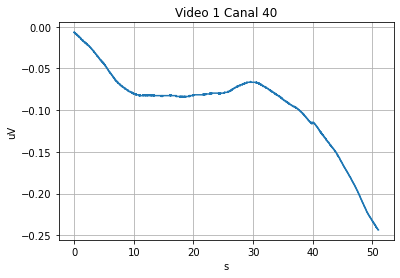

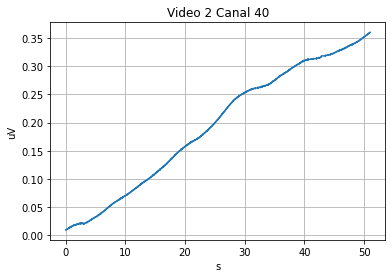

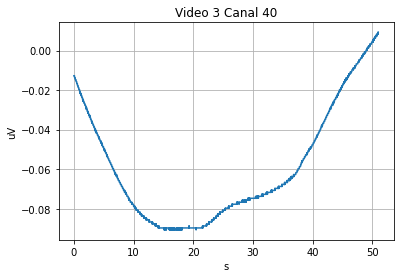

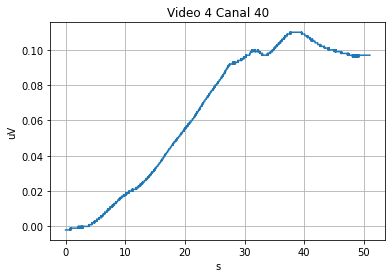

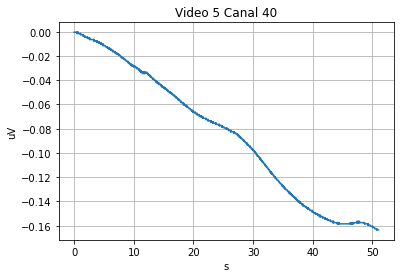

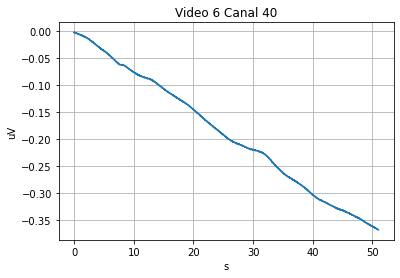

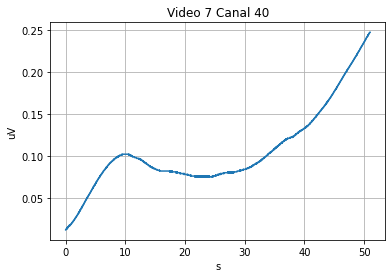

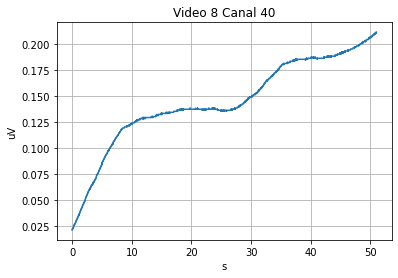

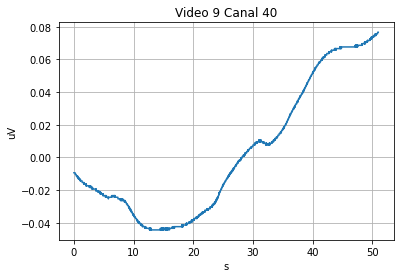

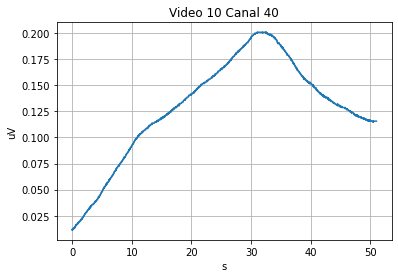

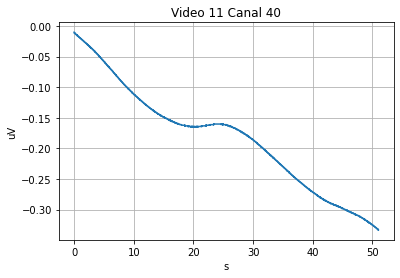

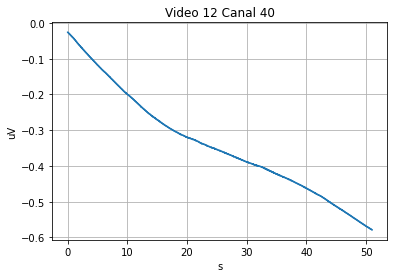

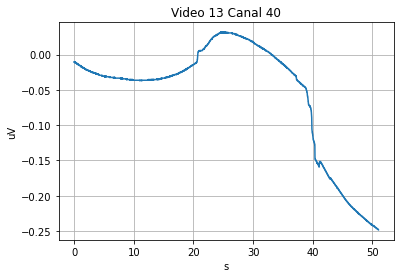

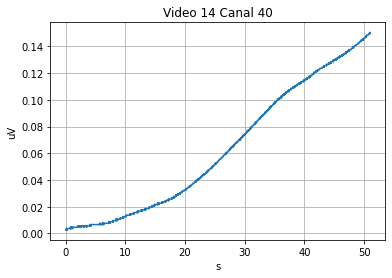

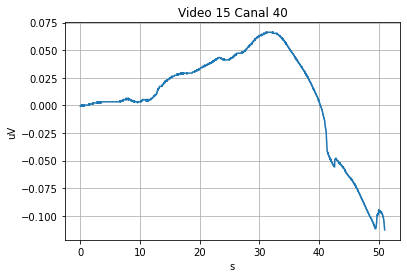

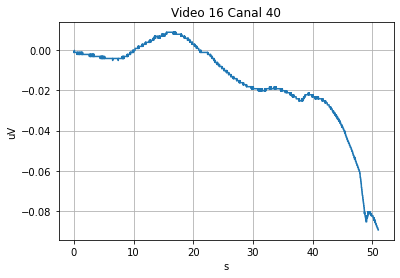

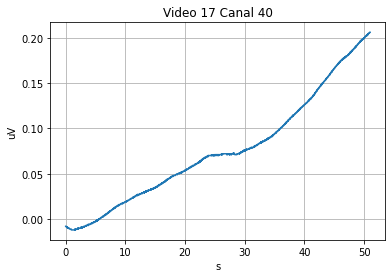

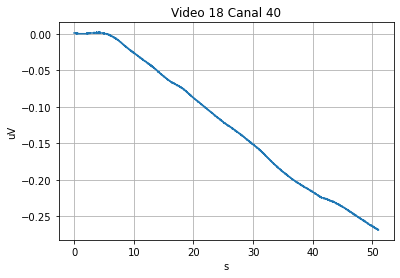

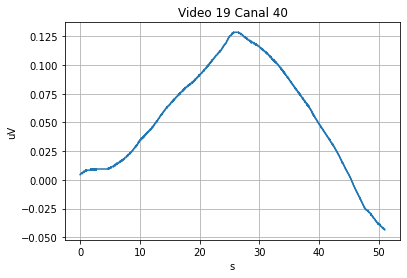

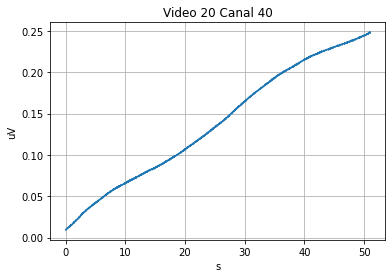

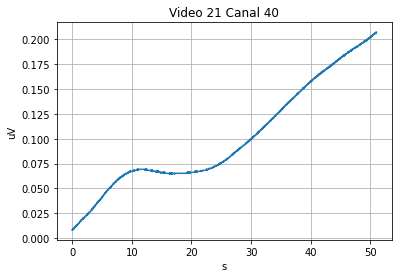

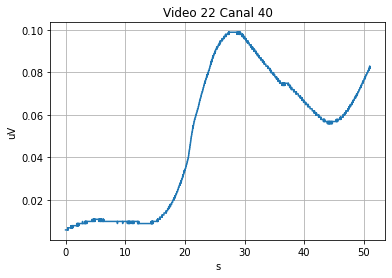

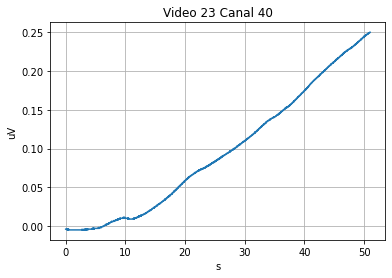

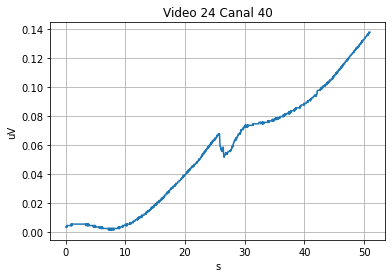

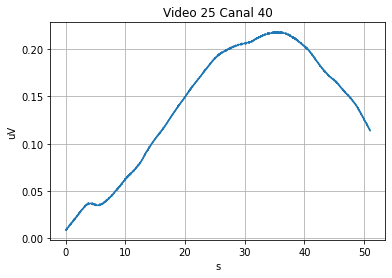

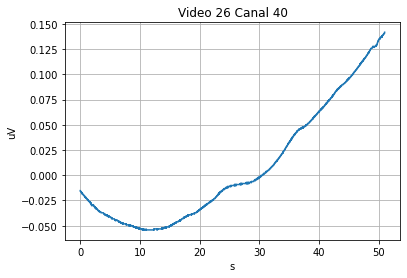

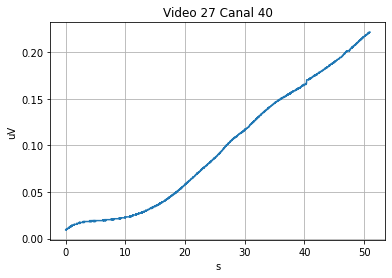

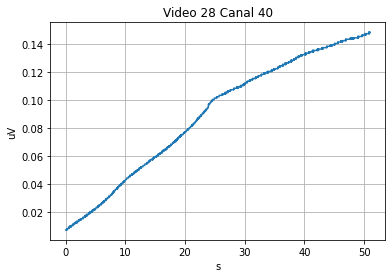

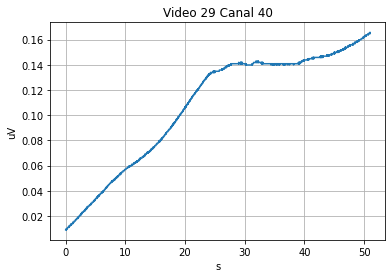

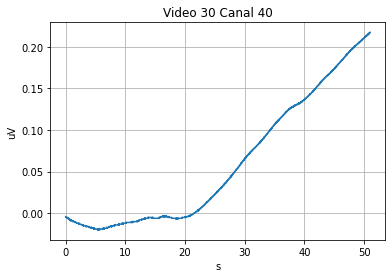

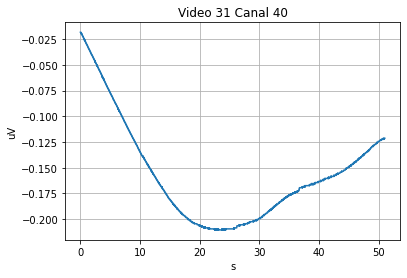

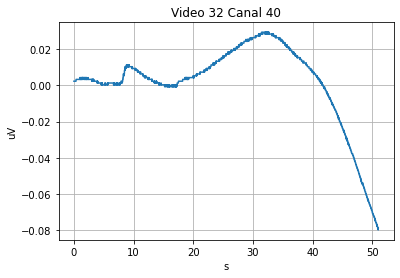

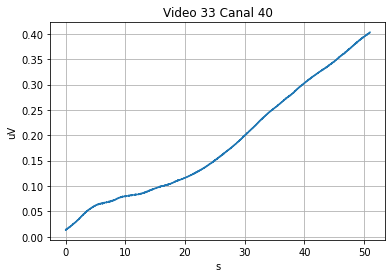

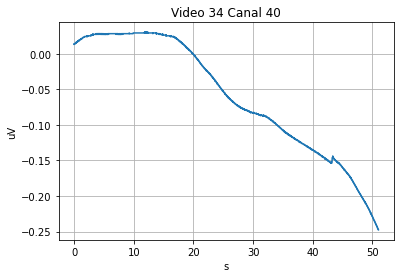

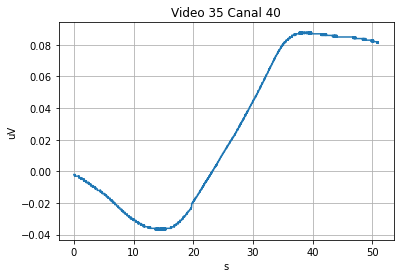

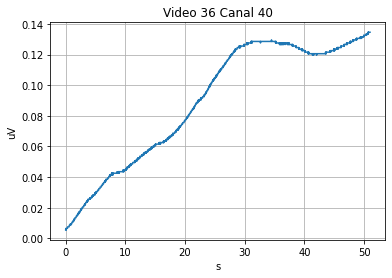

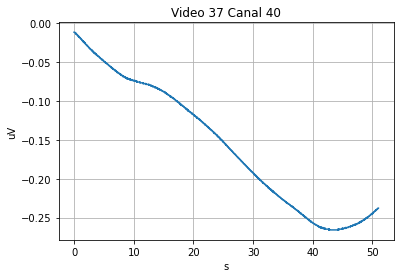

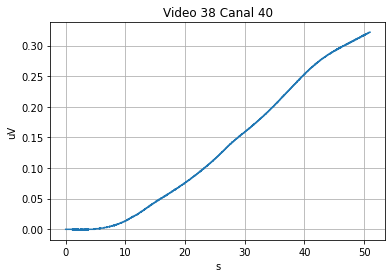

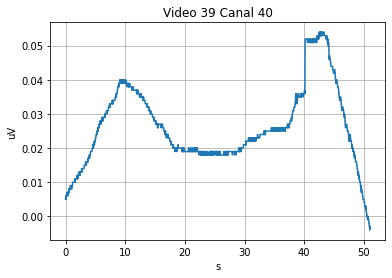

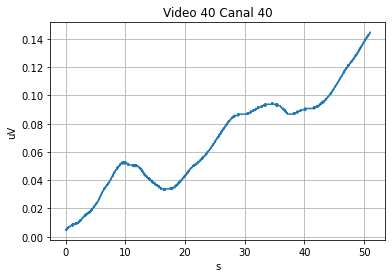

In [24]:
canal_temperature=40 #canal skin temperature
graficar_señales(canal_temperature)

Las caracteristicas más importantes de las señales de temperatura en la piel son:

*  promedio.
*  promedio de su derivado.
*  potencia espectral en las bandas ([0-0,1]Hz, [0,1-0,2]Hz)

solo vamos a calcular 3 los cuales son: **promedio**, **promedio de los derivados** y **potencia espectral en las bandas ([0-0,1]Hz, [0,1-0,2]Hz)**.

### 1) promedio de la temperatura

In [25]:
promedio_temperature=[]
promedio_temperature=promedio_señales(canal_temperature)

print('Promedio de la temperatura: '+'\n')

for i in range(40):
  print('Video'+str(i+1)+': '+str(promedio_temperature[i]))

Promedio de la temperatura: 

Video1: -0.09477360163730016
Video2: 0.1942260648827063
Video3: -0.05932889655317279
Video4: 0.06476111860482729
Video5: -0.08564320393912178
Video6: -0.18870698732632624
Video7: 0.10604704785248924
Video8: 0.14482167349834557
Video9: 0.002866691204037227
Video10: 0.12926396846108426
Video11: -0.1826987922635723
Video12: -0.33921976436281054
Video13: -0.054381656031378574
Video14: 0.06314870054292758
Video15: 0.007813625357207227
Video16: -0.015807089096107556
Video17: 0.07555203423931023
Video18: -0.1243859672478028
Video19: 0.054805057468054544
Video20: 0.1385961098975816
Video21: 0.10099640792032674
Video22: 0.049846174938499445
Video23: 0.0958618229857313
Video24: 0.055387923772982794
Video25: 0.14055319266042596
Video26: 0.007790188157654236
Video27: 0.09763248044141007
Video28: 0.08967348317252853
Video29: 0.10777450733249314
Video30: 0.05941513932047495
Video31: -0.15666680356375548
Video32: 0.0019030087008573636
Video33: 0.18496699236278477
Video34

### 2) promedio de la derivada de la temperatura

In [26]:
#calculo del promedio derivado

promedioDiff_temperature=[]
promedioDiff_temperature=promedioDiff_señales(canal_temperature)

print('Promedio de la derivada de la temperatura: '+'\n')
for i in range(40):
  print('Video'+str(i+1)+': '+str(promedioDiff_temperature[i]))

Promedio de la derivada de la temperatura: 

Video1: -3.631024403939636e-05
Video2: 5.377593104568854e-05
Video3: 3.3705711766528773e-06
Video4: 1.5167570294937404e-05
Video5: -2.4972868263383226e-05
Video6: -5.607404775704332e-05
Video7: 3.6003828477883553e-05
Video8: 2.9109478343820305e-05
Video9: 1.3175869145097612e-05
Video10: 1.5933609198722692e-05
Video11: -4.948611318449506e-05
Video12: -8.472390275859224e-05
Video13: -3.6463451820153854e-05
Video14: 2.2521543771270955e-05
Video15: -1.7159271444778286e-05
Video16: -1.348228470661151e-05
Video17: 3.2786465081987076e-05
Video18: -4.136610080437622e-05
Video19: -7.353973476333551e-06
Video20: 3.661665960091135e-05
Video21: 3.048834837063339e-05
Video22: 1.1643791337528122e-05
Video23: 3.8914776312265035e-05
Video24: 2.0529842621431162e-05
Video25: 1.60868169794791e-05
Video26: 2.4053621578840443e-05
Video27: 3.248004952047318e-05
Video28: 2.160229708673035e-05
Video29: 2.390041379808404e-05
Video30: 3.4012127328042674e-05
Video31: 

### 3) potencia espectral en las bandas([0 - 0.1]Hz, [0.1-0.2]Hz)

In [27]:
def potencia_temperatura(canal):
  fil_band1=[0.001,0.1] #banda 1
  fil_band2=[0.1,0.2] #banda 2
    
  potAbsoluta_band1=[]
  potAbsoluta_band2=[]
  potencia_espectral=[]
  
  for video in range (40):
    señal = X[video,canal-1,:] #señal
    ts = len(señal)/128. #tiempo de muestreo
    time = np.linspace(0,ts,len(señal)) #tiemppo
    fs=128

    sos1 = scipy.signal.butter(5, fil_band1, btype='bandpass',analog=False, fs=128, output='sos') #filtro para la banda 1
    sos2 = scipy.signal.butter(5, fil_band2, btype='bandpass',analog=False, fs=128, output='sos') #filtro para la banda 2

    filtered1 = scipy.signal.sosfilt(sos1, señal) #señal filtrada con la banda 1
    filtered2 = scipy.signal.sosfilt(sos2, señal) #señal filtrada con la banda 2
    
    f1, DSP1 = scipy.signal.welch(filtered1, fs, nperseg=64)
    f2, DSP2 = scipy.signal.welch(filtered2, fs, nperseg=64)

    '''
    plt.semilogy(f1, DSP1)
    #plt.ylim([0.5e-3, 1])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()

    plt.semilogy(f2, DSP2)
    #plt.ylim([0.5e-3, 1])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()
    '''

    potAbsoluta_band1.append(np.sum(DSP1))
    potAbsoluta_band2.append(np.sum(DSP2))
    potencia_espectral.append(potAbsoluta_band1+potAbsoluta_band2)

  return (potAbsoluta_band1, potAbsoluta_band2)



In [28]:
p_t_band1=[]
p_t_band2=[]
p_t_band1, p_t_band2 = potencia_temperatura(canal_temperature)

#print(np.array(p_t_band1).shape)


print('potencia espectral TOTAL en la banda [0 - 0.1]Hz: '+'\n')

for i in range(40):
  print('Video'+str(i+1)+': '+str(p_t_band1[i]))


print('\npotencia espectral TOTAL en la banda [0.1-0.2]Hz: '+'\n')
for i in range(40):
  print('Video'+str(i+1)+': '+str(p_t_band2[i]))



potencia espectral TOTAL en la banda [0 - 0.1]Hz: 

Video1: 5.328536977436536e-08
Video2: 5.8796018343960405e-08
Video3: 4.3585754315700156e-08
Video4: 1.5243445123401106e-08
Video5: 1.454812504131271e-08
Video6: 5.464678041752194e-08
Video7: 6.836444212449137e-08
Video8: 6.516774759022243e-08
Video9: 2.968518072507479e-08
Video10: 7.982646853646115e-08
Video11: 6.729912614900643e-08
Video12: 1.6746294040374486e-07
Video13: 2.2140914422179726e-07
Video14: 1.0217144221142585e-08
Video15: 8.683482085864588e-08
Video16: 6.88793465715743e-09
Video17: 2.558183852924804e-08
Video18: 3.438546316983452e-08
Video19: 8.011077662430995e-08
Video20: 2.6475179691372255e-08
Video21: 2.8354944707037804e-08
Video22: 4.458629000740829e-08
Video23: 3.1832278624936964e-08
Video24: 1.0223604434315486e-08
Video25: 8.259185078638111e-08
Video26: 4.685203685729796e-08
Video27: 2.0617982517350744e-08
Video28: 1.1174342727133147e-08
Video29: 2.3706427271084634e-08
Video30: 4.5585132171172306e-08
Video31: 1.085

# **EMG**


Las señales electromiográficas (EMG) son señales eléctricas producidas por un músculo durante el proceso de contracción y relajación. Esta característica muscular se pretende aprovechar en el control por computadora para conseguir crear interfaces de comunicación entre el usuario y la máquina alternativos a los ya existentes, como son el teclado y el ratón.

Referencia: http://www.encuentros.uma.es/encuentros53/aplicaciones.html#:~:text=Las%20se%C3%B1ales%20electromiogr%C3%A1ficas%20(EMG)%20son,proceso%20de%20contracci%C3%B3n%20y%20relajaci%C3%B3n.&text=Un%20interfaz%20de%20este%20tipo,la%20contracci%C3%B3n%20de%20determinados%20m%C3%BAsculos.


# Graficamos las 40 señales 

La señal EMG tiene dos canales, 35 y 36, nosotros tomaremos el canal 36.

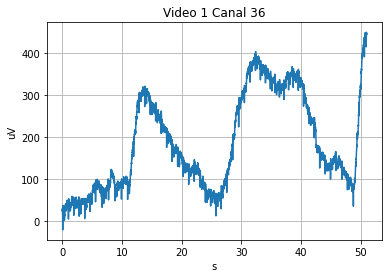

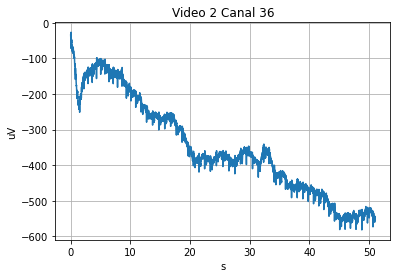

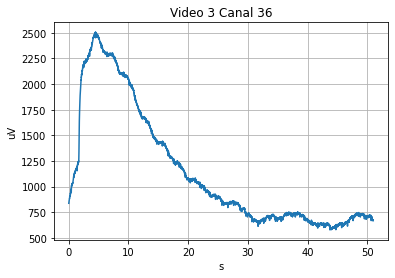

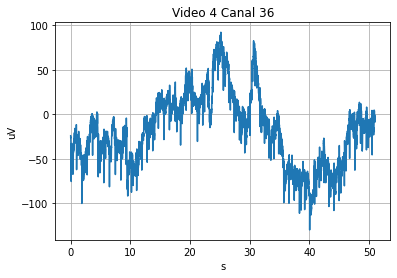

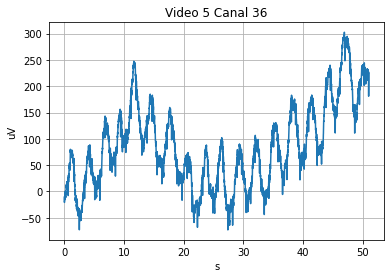

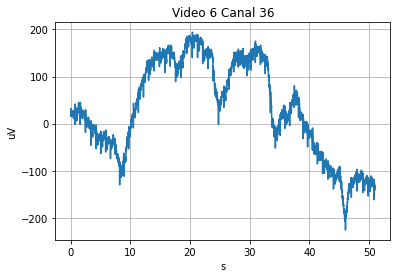

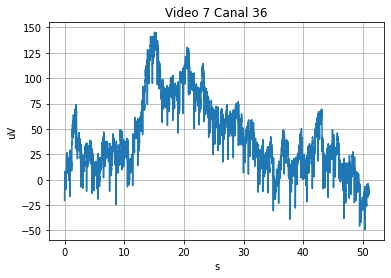

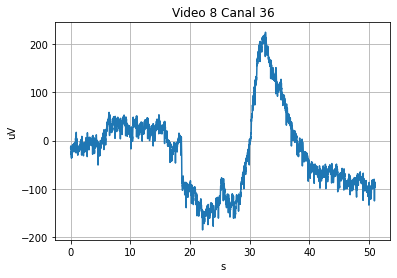

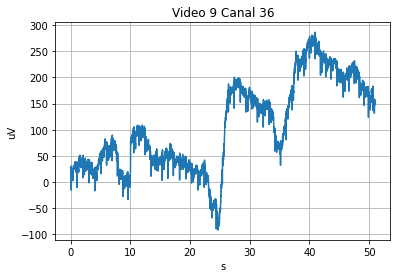

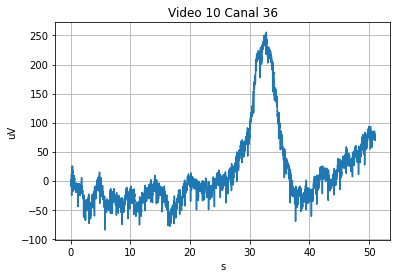

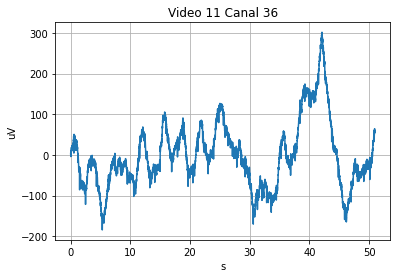

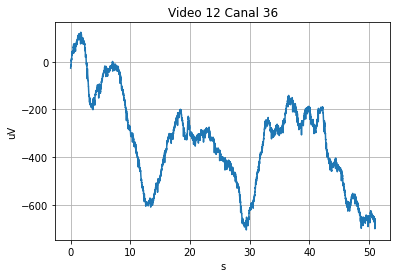

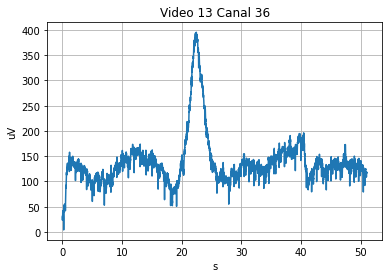

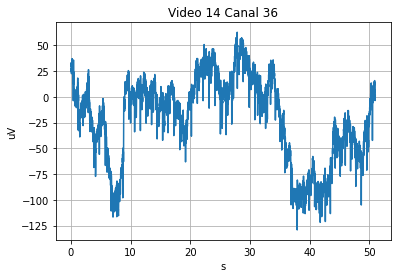

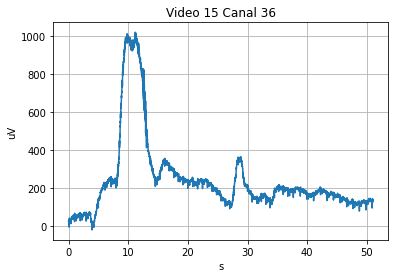

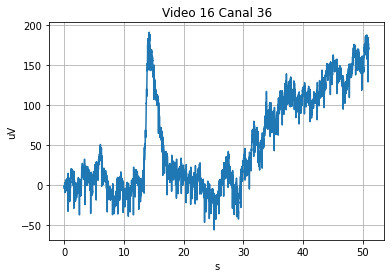

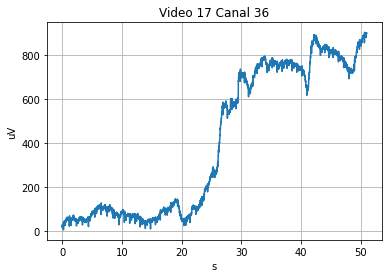

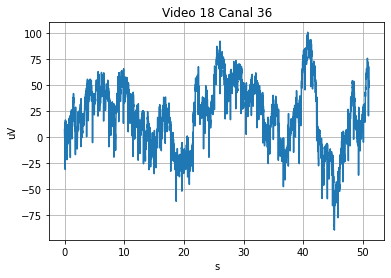

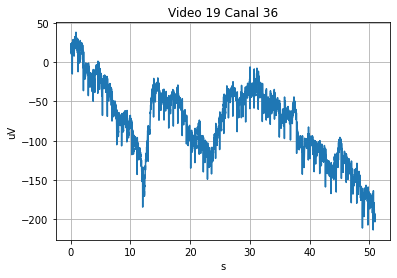

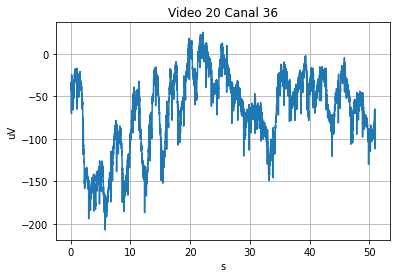

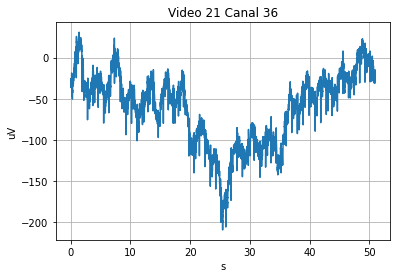

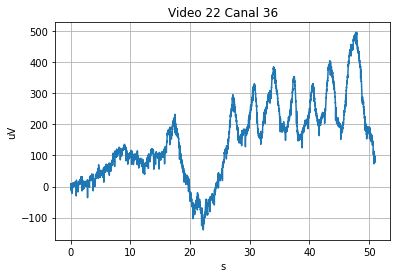

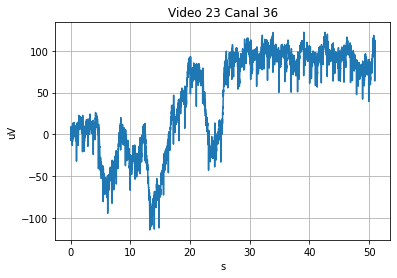

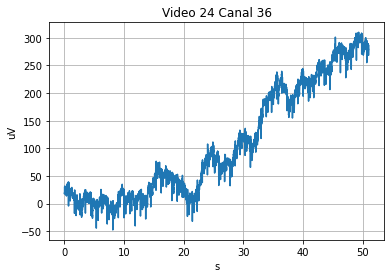

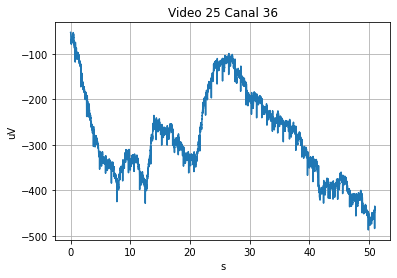

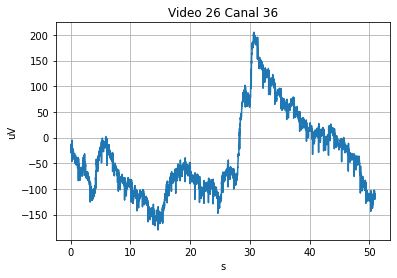

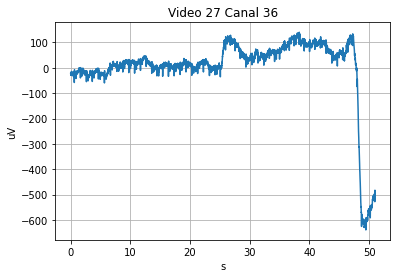

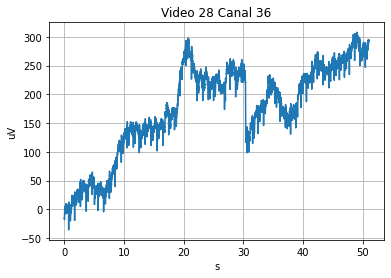

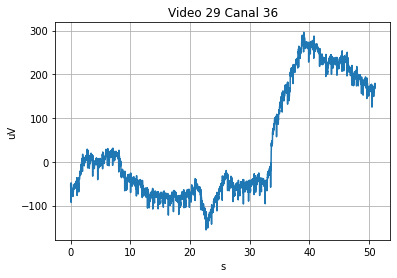

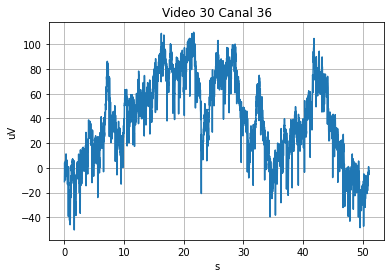

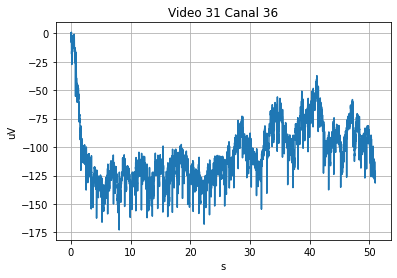

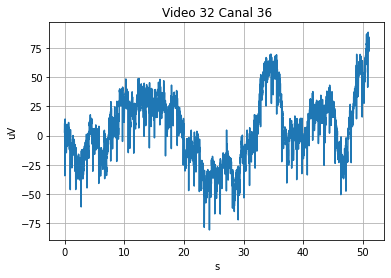

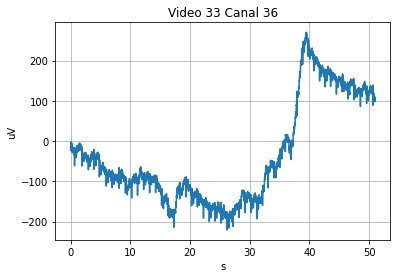

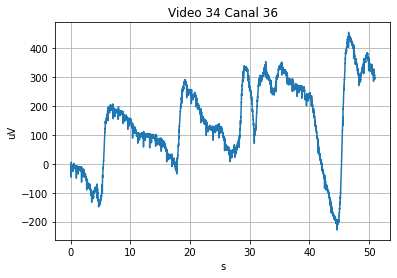

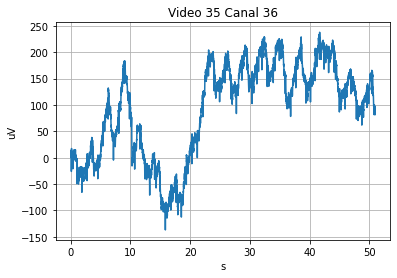

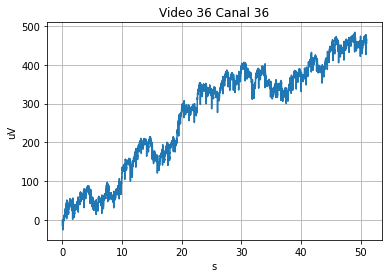

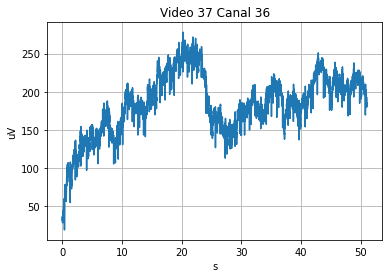

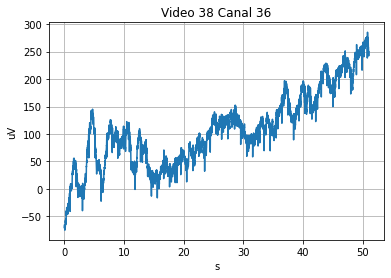

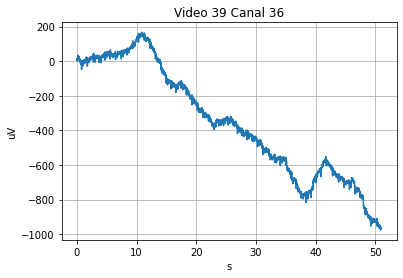

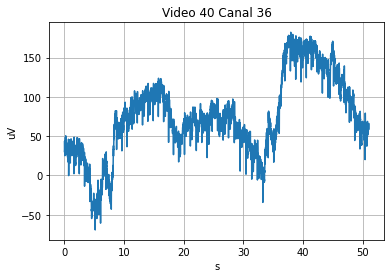

In [29]:
canal_EMG=36 #canal señal EMG
graficar_señales(canal_EMG)

Las caracteristicas más importantes de las señales EMG son:

*  tasa de parpadeo de los ojos
*  la energía de la señal
*  la media y la varianza de la señal

solo vamos a calcular 3 los cuales son: **la energia de la señal**, **la media de la señal** y **la varianza de la señal**.

### 1) Energia de la señal.

In [30]:
def energia_señal(canal):
 
  energia_señal=[]
  
  for video in range (40):
    señal = X[video,canal-1,:] #señal
    ts = len(señal)/128. #tiempo de muestreo
    time = np.linspace(0,ts,len(señal)) #tiemppo

    cuadrado=señal**2
    energia = integrate.simps(cuadrado,time)#calculo la energia
    energia_señal.append(energia)
  return (energia_señal)

In [31]:
energia_EMG=[]
energia_EMG=energia_señal(canal_EMG)
print('Energia de la señal: '+'\n')
for i in range(40):
  print('Video'+str(i+1)+': '+str(energia_EMG[i]))

Energia de la señal: 

Video1: 2425787.3586360994
Video2: 7164498.157239132
Video3: 84811454.71299765
Video4: 95600.43690300065
Video5: 694423.6682665019
Video6: 574571.6026154212
Video7: 153889.04266925657
Video8: 372794.27201327134
Video9: 971470.6726973157
Video10: 236894.08474821606
Video11: 338981.38598016195
Video12: 7569183.998429636
Video13: 1115222.4424167585
Video14: 109812.61538561199
Video15: 5349557.195283455
Video16: 334216.65679093904
Video17: 14217442.674945526
Video18: 69669.3734024929
Video19: 411091.87054840906
Video20: 332564.15515616076
Video21: 285020.97857177915
Video22: 1970509.1017477512
Video23: 262058.67657191245
Video24: 1137269.6394703863
Video25: 4592589.730972052
Video26: 379381.3877401876
Video27: 1005229.5928528281
Video28: 1892060.955176096
Video29: 903564.8395901651
Video30: 134537.1298764711
Video31: 608033.6062707029
Video32: 42040.58706849566
Video33: 874613.707944611
Video34: 2176804.388990634
Video35: 854914.2432829962
Video36: 4774093.690949144


### 2) Varianza de la señal.

In [32]:
def varianza_señales(canal):
  
  varianza_señal=[] #lista para guardar la varianza 

  for video in range(40): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal
    varianza_señal.append(np.var(señal,0))# calculo del promedio de la señal
  
  return(varianza_señal)

In [33]:
varianza_EMG=[]
varianza_EMG=varianza_señales(canal_EMG)
print('varianza de la señal: '+'\n')
for i in range(40):
  print('Video'+str(i+1)+': '+str(varianza_EMG[i]))

varianza de la señal: 

Video1: 12782.728119403315
Video2: 18492.564766749867
Video3: 340329.7020921057
Video4: 1537.6987478402484
Video5: 6197.338843624321
Video6: 10249.257780568416
Video7: 1291.3982419705292
Video8: 6836.4776602942275
Video9: 7442.901211052723
Video10: 4424.455720012199
Video11: 6645.347329763137
Video12: 38297.46348498652
Video13: 2602.1617013737036
Video14: 1702.0684854486044
Video15: 43970.65324717143
Video16: 3655.0536743164057
Video17: 111744.04597434422
Video18: 936.4217558994072
Video19: 2191.8862086346235
Video20: 2068.4863480210374
Video21: 1873.9816624361465
Video22: 16069.82558489819
Video23: 3276.096739042266
Video24: 10436.847557304616
Video25: 9250.7514478923
Video26: 6310.230456095093
Video27: 19700.224162786464
Video28: 6496.526942907368
Video29: 16377.66188249832
Video30: 1133.2784217165868
Video31: 681.2236729758331
Video32: 785.9820473648596
Video33: 15950.357231321945
Video34: 21286.059242117357
Video35: 8017.397547953687
Video36: 19220.126678011

### 3) Media de la señal.

In [34]:
media_EMG=[] 
media_EMG=promedio_señales(canal_EMG)
print('Media de la señal: '+'\n')
for i in range(40):
  print('Video'+str(i+1)+': '+str(media_EMG[i]))

Media de la señal: 

Video1: 186.51995732665324
Video2: -349.26973319931335
Video3: 1149.9880951261323
Video4: -18.345985172950446
Video5: 86.14296946770347
Video6: 31.885190203401105
Video7: 41.54046973572717
Video8: -21.741448414913876
Video9: 107.72453000404617
Video10: 14.841831682970296
Video11: -0.7640534289172376
Video12: -331.8560283962822
Video13: 138.790213449635
Video14: -21.233699085028974
Video15: 246.795696136135
Video16: 53.84662806323013
Video17: 408.7161661345599
Video18: 20.728400731036082
Video19: -76.61895118180657
Video20: -66.72251860240523
Video21: -60.94165267554089
Video22: 150.20766803473603
Video23: 43.1541788404121
Video24: 108.92866763817374
Video25: -284.2558128491362
Video26: -33.59159598113682
Video27: 5.08962371451961
Video28: 174.9389001026732
Video29: 36.5959035809835
Video30: 38.785457975800725
Video31: -106.02034063610307
Video32: 6.219973571407554
Video33: -34.59904758929506
Video34: 146.27553203286868
Video35: 93.50712750585284
Video36: 272.747337

# **EOG**

El electrooculograma (EOG) es un examen que consiste en colocar pequeños electrodos cerca de los músculos de los ojos para medir el movimiento de estos. Este examen es utilizado en la polisomnografía.

En condiciones habituales existe una diferencia de potencial de aproximadamente de 0,4 a 5 mV entre la córnea y la membrana de Bruch situada en la parte posterior del ojo.

El origen de esta diferencia se encuentra en el epitelio pigmentario de la retina y permite considerar la presencia de un dipolo, el cual puede ser representado por un vector cuyo brazo coincide con el eje anteroposterior del globo ocular, donde la córnea corresponde al extremo positivo y la retina al extremo negativo de dicho dipolo.


Referecia: http://www.scielo.br/pdf/abo/v54n5/0004-2749-abo-54-05-0233.pdf

# Graficamos las 40 señales 

La señal EOG tiene dos canales, 33 y 34, nosotros tomaremos el canal 33.

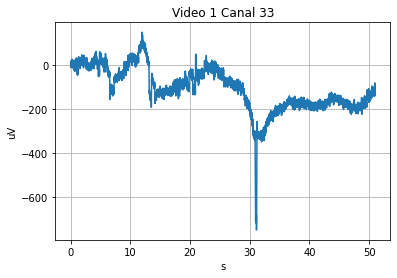

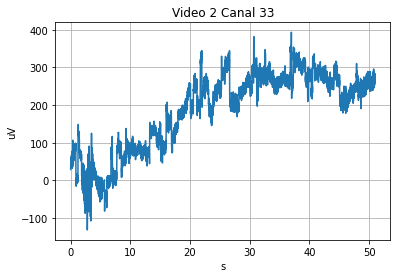

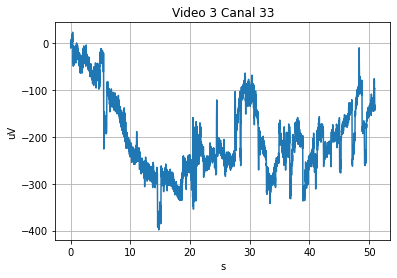

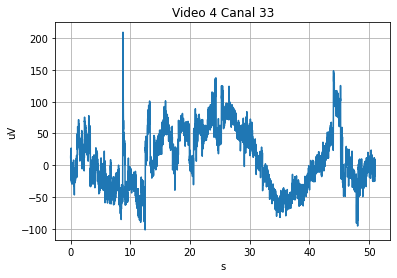

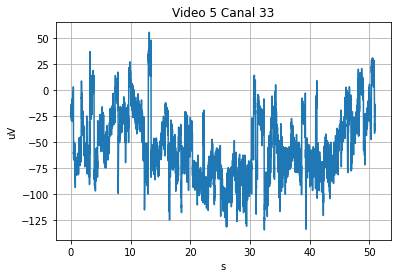

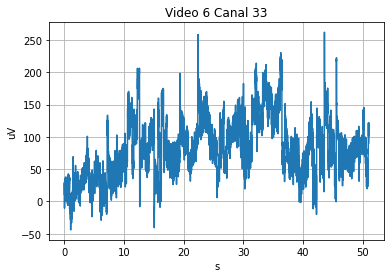

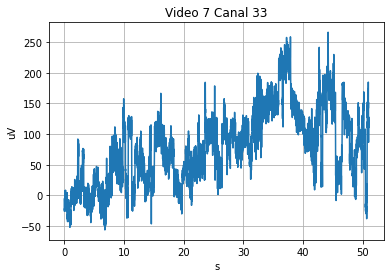

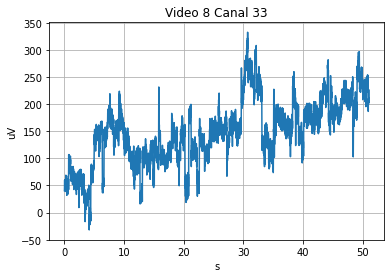

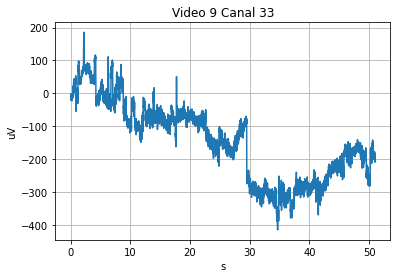

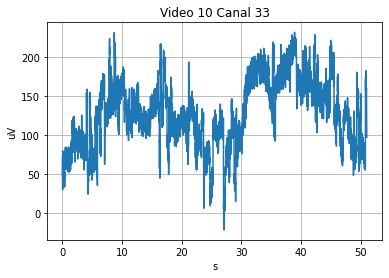

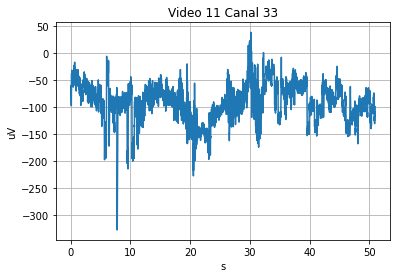

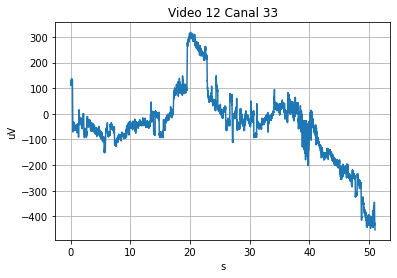

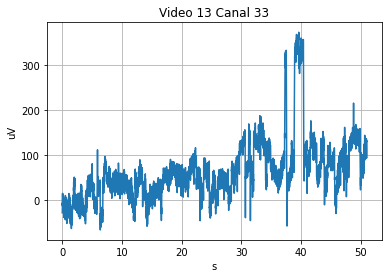

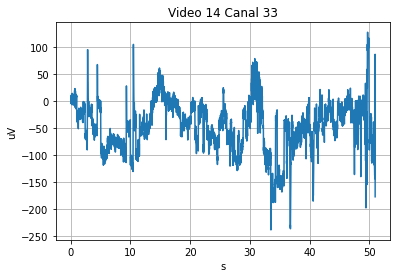

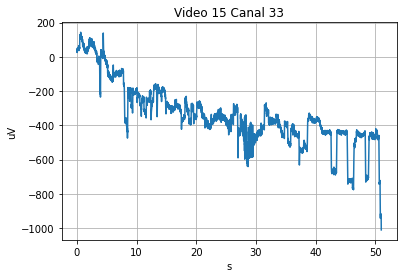

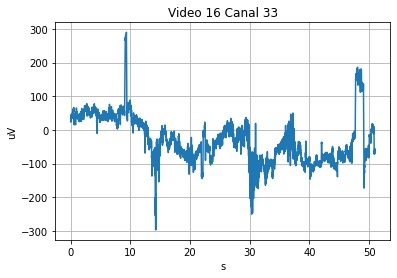

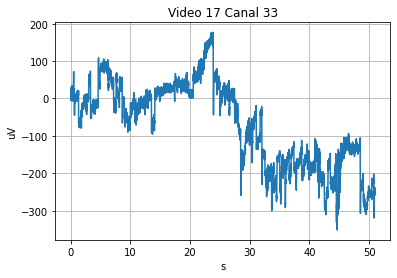

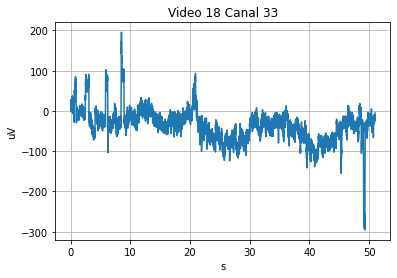

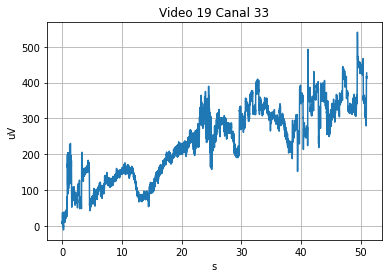

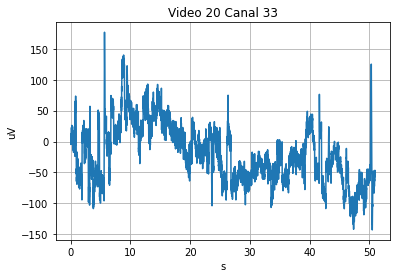

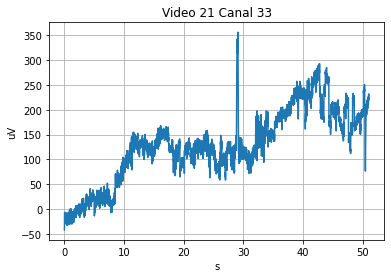

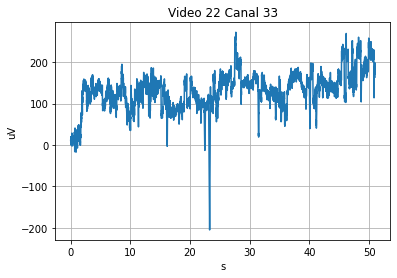

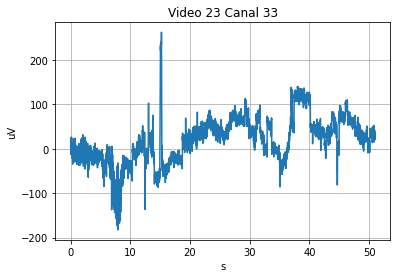

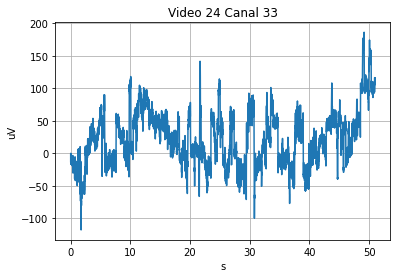

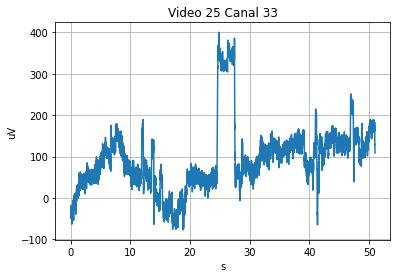

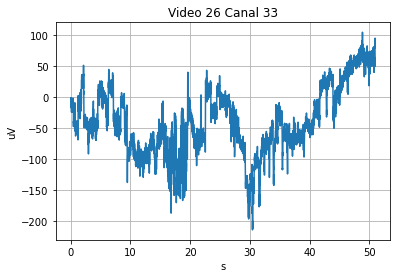

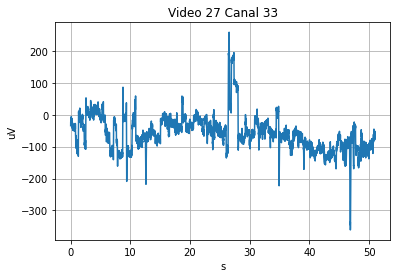

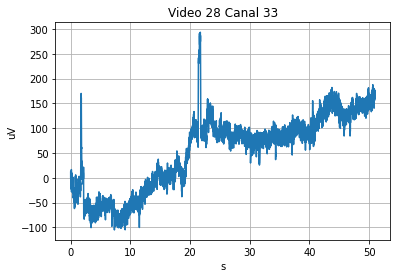

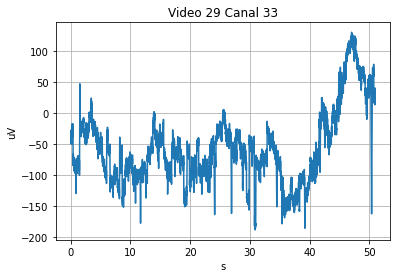

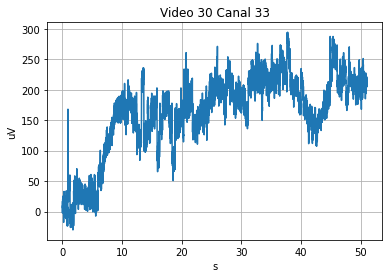

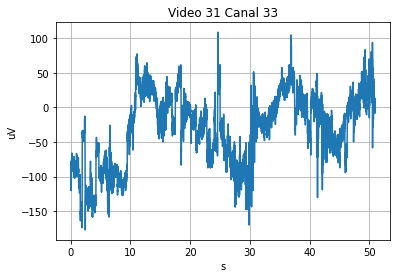

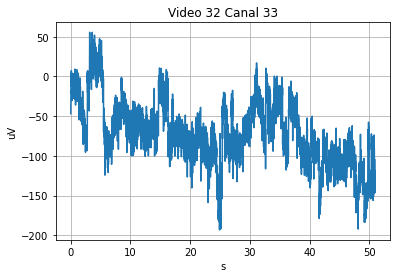

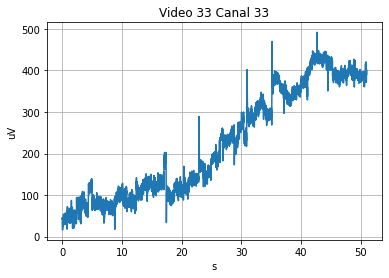

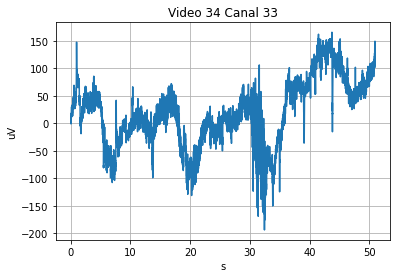

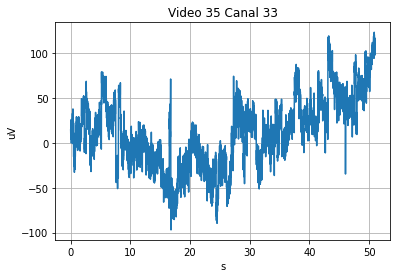

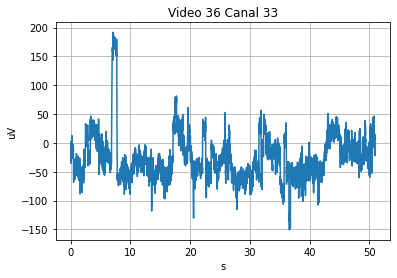

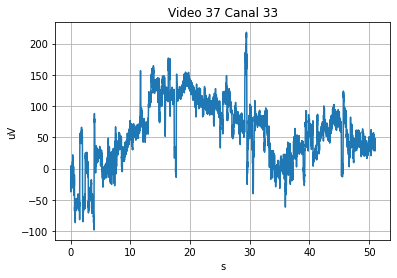

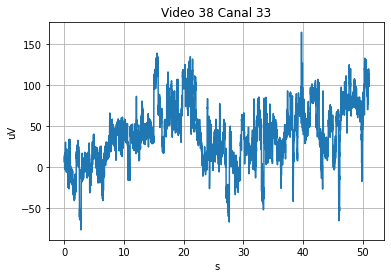

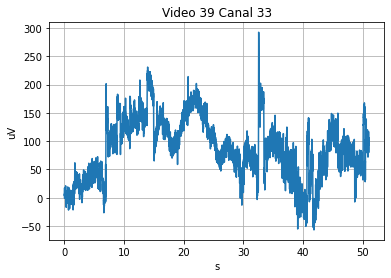

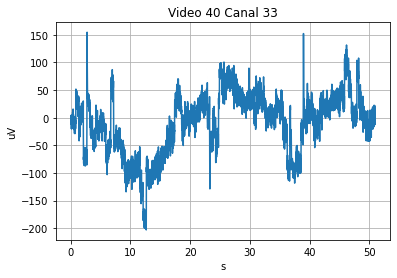

In [35]:
canal_EOG=33 #canal señal EOG
graficar_señales(canal_EOG)

Las caracteristicas más importantes de las señales EOG son:

*  tasa de parpadeo de los ojos
*  la energía de la señal
*  la media y la varianza de la señal

solo vamos a calcular 3 los cuales son: **la energia de la señal**, **la media de la señal** y **la varianza de la señal**.

### 1) Energia de la señal.

In [36]:
energia_EOG=[]
energia_EOG=energia_señal(canal_EOG)
print('Energia de la señal: '+'\n')
for i in range(40):
  print('Video'+str(i+1)+': '+str(energia_EOG[i]))

Energia de la señal: 

Video1: 1110864.5439328868
Video2: 2328098.700775167
Video3: 2373398.8018718543
Video4: 113883.21561178146
Video5: 192239.1161399099
Video6: 458142.715590522
Video7: 508310.2736810967
Video8: 1303189.1599902778
Video9: 1785785.6135066806
Video10: 941377.7713240831
Video11: 487990.543222125
Video12: 1059728.345166735
Video13: 454529.7286824612
Video14: 214392.03449645772
Video15: 7508515.378446988
Video16: 283388.38898457785
Video17: 868927.2404849608
Video18: 148754.5918540022
Video19: 3387318.725645727
Video20: 130134.3354933882
Video21: 1112007.5911416754
Video22: 986141.1484464492
Video23: 155654.6944196218
Video24: 114814.79579740425
Video25: 803170.5410129612
Video26: 224720.512993519
Video27: 323455.903309025
Video28: 444383.4872811773
Video29: 346817.29467425094
Video30: 1573226.866390008
Video31: 181035.37446174864
Video32: 334233.10749176773
Video33: 3392583.998386443
Video34: 194828.81710683118
Video35: 79672.95269556764
Video36: 115760.68281965244
Vide

### 2) Varianza de la señal.

In [37]:
varianza_EOG=[]
varianza_EOG=varianza_señales(canal_EOG)
print('varianza de la señal: '+'\n')
for i in range(40):
  print('Video'+str(i+1)+': '+str(varianza_EOG[i]))

varianza de la señal: 

Video1: 10123.115082148857
Video2: 10644.052330446475
Video3: 6743.690177580037
Video4: 2109.1401681642237
Video5: 935.1719174161234
Video6: 2042.9152390889494
Video7: 3657.8234208298472
Video8: 3551.780399824979
Video9: 14044.5999510723
Video10: 1846.628179171288
Video11: 1169.0608622641078
Video12: 18767.876517178487
Video13: 4728.508663039539
Video14: 2155.2051248197995
Video15: 33434.44127616992
Video16: 4674.186926557896
Video17: 12459.684350566751
Video18: 1658.423853577177
Video19: 10538.030901405093
Video20: 2201.9881574796927
Video21: 5328.405707018923
Video22: 2184.3076352127114
Video23: 2657.9864072040123
Video24: 1743.3265882647247
Video25: 6584.193418246032
Video26: 2908.4766225655762
Video27: 3087.03390306478
Video28: 5806.39607447244
Video29: 3540.980972765882
Video30: 4249.621223342854
Video31: 2591.2580685955904
Video32: 1589.922927717346
Video33: 17007.121097568757
Video34: 3453.0728204398197
Video35: 1424.7398475353166
Video36: 1636.0437782273

### 3) Media de la señal.

In [38]:
media_EOG=[] 
media_EOG=promedio_señales(canal_EOG)
print('Media de la señal: '+'\n')
for i in range(40):
  print('Video'+str(i+1)+': '+str(media_EOG[i]))

Media de la señal: 

Video1: -107.96248050643713
Video2: 187.09436649813927
Video3: -199.4692814005694
Video4: 11.114610666961996
Video5: -53.23239053402922
Video6: 83.30366232890307
Video7: 79.4257254456054
Video8: 148.32591695448633
Video9: -144.804740671203
Video10: 128.87899842209407
Video11: -91.64703309514199
Video12: -44.996594630394654
Video13: 64.68259819883876
Video14: -45.283727410197194
Video15: -337.41346298050513
Video16: -29.697177242678432
Video17: -67.67867205164876
Video18: -35.46690367575066
Video19: 236.39783793606472
Video20: -18.695421567793247
Video21: 128.35998034764145
Video22: 130.96140878991991
Video23: 19.840391112605687
Video24: 22.553329382537854
Video25: 95.72249374025984
Video26: -38.69892703885607
Video27: -57.04879451936403
Video28: 53.921708347268776
Video29: -57.08373528657794
Video30: 163.08499469251953
Video31: -30.96242651325581
Video32: -70.45741327915444
Video33: 222.52134607472294
Video34: 19.165343531868334
Video35: 11.754415895628007
Video36:

# **EEG**

La electroencefalografía (EEG) es una exploración neurofisiológica que se basa en el registro de la actividad bioeléctrica cerebral en condiciones basales de reposo, en vigilia o sueño, y durante diversas activaciones (habitualmente hiperpnea y estimulación luminosa intermitente) mediante un equipo de electroencefalografia (producto sanitario).

Referencia: https://www.sciencedirect.com/science/article/pii/S021348531930074X


Las caracteristicas más importantes de las señales EEG son:

Espectro theta, lento alfa, alfa, beta y gamma.

Energía de cada electrodo.

Potencia espectral asimetrica entre 14 pares de electrodos en las cuatro bandas de alfa, beta, theta y gamma.

solo vamos a calcular 3 de la potencia espectal asimetrica de: **thea**, **alpha** y **beta**.

### 1) Potencia espectral total de cada electrodo en las diferentes bandas (theta, alpha, beta, gamma)

In [39]:
# Spectral power for each electrode.

#SPEE=[]
#potAbsoluta=[]

def eeg_spec_01(band):
    
    SPEE=[]
    potAbsoluta=[]
    
    if (band=='theta'):
        fil_band=[4, 7]
    if (band=='alpha'):
        fil_band=[8, 12]
    if (band=='beta'):
        fil_band=[13, 30]
    if (band=='gamma'):
        fil_band=[30, 45]
        
    for channel in range(32):
        for trial in range(40):
            
            eeg_sig = X[trial,channel,:]
            
            sos = scipy.signal.butter(7, fil_band, btype='bandpass',analog=False, fs=128, output='sos')
            #ts = len(eeg_sig)/128.
            #time = np.linspace(0,ts,len(eeg_sig))
            
            filtered = scipy.signal.sosfilt(sos, eeg_sig)
              
            #print('\nSpectral power of channel ', channel+1, 'video ', trial+1)
            f, Spec = scipy.signal.welch(filtered, 128, window='hann')
            '''
            plt.semilogy(f, Spec)
            #plt.ylim([0.5e-3, 1])
            plt.xlabel('frequency [Hz]')
            plt.ylabel('PSD [V**2/Hz]')
            plt.show()
            '''
            
            #SPEE.append(Spec)
            
            potAbsoluta.append(np.sum(Spec))
            
    return(potAbsoluta)

### 1) Theta

In [40]:
sp_theta=[]
sp_theta=eeg_spec_01('theta')

for i in range(32):
    for j in range(40):
        
        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)
        print('\n', sp_theta[j])


Se han truncado las últimas 5000 líneas del flujo de salida.
TOTAL Spectral power of channel  1 video  31

 96.55156504259453

TOTAL Spectral power of channel  1 video  32

 88.74052437543757

TOTAL Spectral power of channel  1 video  33

 94.1086482384357

TOTAL Spectral power of channel  1 video  34

 86.45159792770282

TOTAL Spectral power of channel  1 video  35

 65.4782313856723

TOTAL Spectral power of channel  1 video  36

 79.20211804441188

TOTAL Spectral power of channel  1 video  37

 105.6405783059965

TOTAL Spectral power of channel  1 video  38

 108.95480463101335

TOTAL Spectral power of channel  1 video  39

 105.2720283098606

TOTAL Spectral power of channel  1 video  40

 109.11916556308678

TOTAL Spectral power of channel  2 video  1

 109.49336441081368

TOTAL Spectral power of channel  2 video  2

 126.16968543780968

TOTAL Spectral power of channel  2 video  3

 136.77676433010836

TOTAL Spectral power of channel  2 video  4

 68.87600204374738

TOTAL Spectral p

### 2) Alpha

In [41]:
sp_alpha=[]

sp_alpha=eeg_spec_01('alpha')

for i in range(32):
    for j in range(40):
        
        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)
        print('\n', sp_alpha[j])
        

Se han truncado las últimas 5000 líneas del flujo de salida.
TOTAL Spectral power of channel  1 video  31

 79.81638347860343

TOTAL Spectral power of channel  1 video  32

 57.375215351976316

TOTAL Spectral power of channel  1 video  33

 47.67037898387121

TOTAL Spectral power of channel  1 video  34

 74.03432453115359

TOTAL Spectral power of channel  1 video  35

 44.2387370731353

TOTAL Spectral power of channel  1 video  36

 83.8178824076699

TOTAL Spectral power of channel  1 video  37

 70.85906497292224

TOTAL Spectral power of channel  1 video  38

 67.67268201512827

TOTAL Spectral power of channel  1 video  39

 49.529704915015195

TOTAL Spectral power of channel  1 video  40

 75.0156102975795

TOTAL Spectral power of channel  2 video  1

 51.66589812474143

TOTAL Spectral power of channel  2 video  2

 99.2166714939381

TOTAL Spectral power of channel  2 video  3

 62.28910119676231

TOTAL Spectral power of channel  2 video  4

 58.02340648782162

TOTAL Spectral power 

### 3) Beta

In [42]:
sp_beta=[]

sp_beta=eeg_spec_01('beta')

for i in range(32):
    for j in range(40):
        
        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)
        print('\n', sp_beta[j])


Se han truncado las últimas 5000 líneas del flujo de salida.
TOTAL Spectral power of channel  1 video  31

 60.13407806506253

TOTAL Spectral power of channel  1 video  32

 56.01955304303441

TOTAL Spectral power of channel  1 video  33

 38.36035794888692

TOTAL Spectral power of channel  1 video  34

 64.99869106877858

TOTAL Spectral power of channel  1 video  35

 42.18090266992183

TOTAL Spectral power of channel  1 video  36

 51.85996990635603

TOTAL Spectral power of channel  1 video  37

 42.63513802275415

TOTAL Spectral power of channel  1 video  38

 48.92408955283993

TOTAL Spectral power of channel  1 video  39

 61.54793741278224

TOTAL Spectral power of channel  1 video  40

 59.34074642526724

TOTAL Spectral power of channel  2 video  1

 61.25208096076176

TOTAL Spectral power of channel  2 video  2

 63.29307738687574

TOTAL Spectral power of channel  2 video  3

 56.70370541013706

TOTAL Spectral power of channel  2 video  4

 50.51339705020639

TOTAL Spectral powe

### 4) Gamma

In [43]:
sp_gamma=[]

sp_gamma=eeg_spec_01('gamma')

for i in range(32):
    for j in range(40):
        
        print('\nTOTAL Spectral power of channel ', i+1, 'video ', j+1)
        print('\n', sp_gamma[j])
        

Se han truncado las últimas 5000 líneas del flujo de salida.
TOTAL Spectral power of channel  1 video  31

 23.97188305697214

TOTAL Spectral power of channel  1 video  32

 37.80490384804035

TOTAL Spectral power of channel  1 video  33

 19.726988840620052

TOTAL Spectral power of channel  1 video  34

 43.84516565078668

TOTAL Spectral power of channel  1 video  35

 17.75694777416667

TOTAL Spectral power of channel  1 video  36

 18.803453333057664

TOTAL Spectral power of channel  1 video  37

 10.600024102233206

TOTAL Spectral power of channel  1 video  38

 13.03767163114877

TOTAL Spectral power of channel  1 video  39

 40.89040641649372

TOTAL Spectral power of channel  1 video  40

 29.10599244196877

TOTAL Spectral power of channel  2 video  1

 35.666523370425345

TOTAL Spectral power of channel  2 video  2

 31.548893301436944

TOTAL Spectral power of channel  2 video  3

 25.216559150700668

TOTAL Spectral power of channel  2 video  4

 20.115428949862444

TOTAL Spectr

### 2) Potencia espectral total de la diferencian entre los 14 pares de electtodos en cada banda

In [44]:
# El orden de SPEEpair los primeros 14 son para el primer video los siguientes 14 son para el segundo video (varia el par y luego el video)

#SPEEpair=[]
#pair=[]

def eeg_spec_pair(band):
    if (band=='theta'):
        fil_band=[4, 7]
    if (band=='alpha'):
        fil_band=[8, 12]
    if (band=='beta'):
        fil_band=[13, 30]
    if (band=='gamma'):
        fil_band=[30, 45]
    
    SPEEpair=[]

    for trial in range (40):
        
        pair=[]
        pair.append(X[trial,0,:] - X[trial,16,:])
        pair.append(X[trial,1,:] - X[trial,17,:])
        pair.append(X[trial,2,:] - X[trial,19,:])
        pair.append(X[trial,3,:] - X[trial,20,:])
        pair.append(X[trial,4,:] - X[trial,21,:])
        pair.append(X[trial,5,:] - X[trial,22,:])
        pair.append(X[trial,6,:] - X[trial,24,:])
        pair.append(X[trial,7,:] - X[trial,25,:])
        pair.append(X[trial,8,:] - X[trial,26,:])
        pair.append(X[trial,9,:] - X[trial,27,:])
        pair.append(X[trial,10,:] - X[trial,28,:])
        pair.append(X[trial,11,:] - X[trial,29,:])
        pair.append(X[trial,12,:] - X[trial,30,:])
        pair.append(X[trial,13,:] - X[trial,31,:])
        
        for i in range(14):
            eeg_sig= pair[i]
            sos = scipy.signal.butter(5, fil_band, btype='bandpass',analog=False, fs=128, output='sos')
            #ts = len(eeg_sig)/128.
            #time = np.linspace(0,ts,len(eeg_sig))

            filtered = scipy.signal.sosfilt(sos, eeg_sig)

            #print('\nSpectral power of pair ', channel+1, 'video ', trial+1)
            Spec=0
            f, Spec = scipy.signal.welch(filtered, 128, window='hann')
            
            '''
            plt.semilogy(f, Spec)
            #plt.ylim([0.5e-3, 1])
            plt.xlabel('frequency [Hz]')
            plt.ylabel('PSD [V**2/Hz]')
            plt.show()
            '''
            
            SPEEpair.append(np.sum(Spec))
            
    return(SPEEpair)


### 1) THETA.

In [46]:

pair_sp_theta=[]
pair_sp_theta=eeg_spec_pair('theta')

print((pair_sp_theta))
h=0
for i in range(40):
    for j in range(14):
        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)
        print('\n', pair_sp_theta[(j*i)+j])




[29.207107413151185, 819.145646605069, 95.78474298153304, 25871.403829960556, 305.2462558273755, 1495.8255242873015, 35.135052387053875, 812.3422231931288, 184.94561267569608, 85.15679859326268, 193.5940121746946, 13.486197916962109, 97.96466230611951, 68.43539545042582, 60.50744906881462, 1550.4935386658444, 134.13123443141237, 54054.862445694904, 609.3095674483322, 2973.6528624830753, 48.65390213225576, 1707.684653173782, 382.2078560484755, 144.47478069248473, 407.261044505443, 15.005198897872368, 154.82046791833287, 134.7041150684119, 35.208091342023835, 1077.007932088984, 115.85127469623318, 35291.216853998114, 394.5429100907008, 1992.2982472937235, 39.92161488999767, 1128.0989337949875, 255.98502990506947, 106.83723239529465, 268.2200984255852, 12.812786248725816, 114.67024869778027, 97.18974373098371, 12.842415952281813, 400.0533875658433, 61.14737512297908, 11194.497534914735, 137.5467713509694, 681.4449877708261, 25.648482156200178, 365.0882332204331, 77.95960088691903, 45.0495

### 2) ALPHA.

In [ ]:
pair_sp_alpha=[]
pair_sp_alpha=eeg_spec_pair('alpha')

for i in range(40):
    for j in range(14):
        
        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)
        print('\n', pair_sp_alpha[i])

### 3) BETA.

In [ ]:
pair_sp_beta=[]
pair_sp_beta=eeg_spec_pair('beta')

for i in range(40):
    for j in range(14):
        
        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)
        print('\n', pair_sp_beta[i])

### 4) GAMMA

In [ ]:
pair_sp_gamma=[]
pair_sp_gamma=eeg_spec_pair('gamma')

for i in range(40):
    for j in range(14):
        
        print('\nTOTAL Spectral power of PAIR ', j+1, 'video ', i+1)
        print('\n', pair_sp_gamma[i])

In [ ]:
pair1_theta=[]
pair2_theta=[]
pair3_theta=[]
pair4_theta=[]
pair5_theta=[]
pair6_theta=[]
pair7_theta=[]
pair8_theta=[]
pair9_theta=[]
pair10_theta=[]
pair11_theta=[]
pair12_theta=[]
pair13_theta=[]
pair14_theta=[]

for i in range(40):
  pair1_theta.append(pair_sp_theta[i*14])
  pair2_theta.append(pair_sp_theta[i*14+1])
  pair3_theta.append(pair_sp_theta[i*14+2])
  pair4_theta.append(pair_sp_theta[i*14+3])
  pair5_theta.append(pair_sp_theta[i*14+4])
  pair6_theta.append(pair_sp_theta[i*14+5])
  pair7_theta.append(pair_sp_theta[i*14+6])
  pair8_theta.append(pair_sp_theta[i*14+7])
  pair9_theta.append(pair_sp_theta[i*14+8])
  pair10_theta.append(pair_sp_theta[i*14+9])
  pair11_theta.append(pair_sp_theta[i*14+10])
  pair12_theta.append(pair_sp_theta[i*14+11])
  pair13_theta.append(pair_sp_theta[i*14+12])
  pair14_theta.append(pair_sp_theta[i*14+13])

* promedio_GSR=[] 		    -> Resistencia promedio de la piel
* promedioDiff_GSR=[] 		-> Promedio de la derivada
* minimos_locales_GSR =[] 	-> Minimos locales


* promedio_BVP=[]			    -> Promedio presion de volumen sanguineo
* std_BVP=[]			        -> Desviacion estandar presion de volumen sanguineo
* R_energy_BVP=[]			    -> Relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz.


* promedioDiff_RP=[]		    -> Promedio de la derivada patron de respiracion
* std_RP=[]			        -> Desviacion estandar 
* F_respiratoria=[]		    -> Frecuencia respiratoria


* promedio_temperature=[]		-> Promedio Temperatura 
* promedioDiff_temperature=[]	-> Promedio de la derivada
* p_t_band1=[]			    -> Potencia espectral TOTAL en la banda [0 - 0.1]Hz
* p_t_band2=[]			    -> Potencia espectral TOTAL en la banda [0.1 - 0.2]Hz


* energia_EMG=[]			    -> Energia de senal EMG
* varianza_EMG=[]			    -> Varianza senal EMG
* media_EMG=[]    		    -> Media senal EMG


* energia_EOG=[]			    -> Energia de senal EOG
* varianza_EOG=[]			    -> Varianza senal EOG
* media_EOG=[]    		    -> Media senal EOG


* sp_theta=[](primeros40canal1)	-> Potencia espectral total de cada electrodo en la banda theta
* sp_alpha=[]			            -> Potencia espectral total de cada electrodo en la banda alpha
* sp_beta=[]			            -> Potencia espectral total de cada electrodo en la banda beta
* sp_gamma=[]			            -> Potencia espectral total de cada electrodo en la banda gamma


**(PARA LOS PARES ACONTINUACION PRIMEROS 40 VIDEO FIJO PARES VARIABLES)**
* pair_sp_theta=[]		    -> Potencia espectral total de la diferencian entre los 14 pares de electtodos en cada banda
* pair_sp_alpha=[]
* pair_sp_beta=[]
* pair_sp_gamma=[]


###creación de base de datos.

In [ ]:
labels = db['labels']
Valence = labels[:,0]
Arousal = labels[:,1]

print(labels[9,:])

## Visualización de las etiquetas emocionales

Para esto, se realizará un agrupamiento de las etiqeutas de $arousal$, $valence$ en 3 grupos:

1. Emociones Negativas: arousal $[1-3]$ y valence $[1-3]$. 
2. Emociones Neutras: arousal $[4-6]$ y valence $[4-6]$.
3. Emociones Positivas: arousal $[7-9]$ y valence $[7-9]$. 

In [ ]:
pos = 'positive' # etiqueta numerica 1
neu = 'neutral' # etiqueta numerica 2
neg = 'negative' # etiqueta numerica 3
stress = 'stress' # etiqueta numerica 4
calm = 'calm' # etiqueta numerica 5

In [ ]:
# se crea matriz de string para relacionarlo con los valores de las etiquetas
F=[]
for i in range(40):
  F.append("          ")
emocion=np.transpose(F)

In [ ]:
negA = np.logical_and(Arousal>=1,Arousal<=3) # extraccion valores negativos de arousal
negV = np.logical_and(Valence>=1,Valence<=3) # extraccion valores negativos de valence
neutralA = np.logical_and(Arousal>3,Arousal<7) # extraccion valores neutros de arousal
neutralV = np.logical_and(Valence>3,Valence<7) # extraccion valores neutros de valence
posA = Arousal>=7 # extraccion valores positivos de arousal
posV = Valence>=7 # extraccion valores positivos valence

Etiquetas = np.zeros((40,1))

Etiquetas[np.where(np.logical_and(negA,negV))] = 1. # Emocion Negativa negA y negV

Etiquetas[np.where(np.logical_and(neutralA,neutralA))] = 2.# Emocion Neutral neutralA y neutralV

Etiquetas[np.where(np.logical_and(posA,posV))] = 3. # Emocion Positiva posA y posV

Etiquetas[np.where(np.logical_and(posA,negV))] = 4. # Emocion Stress posA y negV

Etiquetas[np.where(np.logical_and(negA,posV))] = 5. # Emocion Calm negA y posV

Etiquetas[np.where(np.logical_and(neutralA,negV))] = 6. # Emocion Tristeza neutralA y negV

Etiquetas[np.where(np.logical_and(neutralA,posV))] = 7. # E3mocion Satisfecho (Pleasant) neutralA y posV

Etiquetas[np.where(np.logical_and(negA,neutralV))] = 8. # Emocion Tranquilidad negA y neutralV

Etiquetas[np.where(np.logical_and(posA,neutralV))] = 9. # Emocion Sorpresa posA y neutralV

#ciclo para emparejar los valores de las etiquetas con las palabras de las emociones
for i in range(40):
  if(Etiquetas[i]==1.):
    emocion[i]="negativa"
  if(Etiquetas[i]==2.):
    emocion[i]="neutral"
  if(Etiquetas[i]==3.):
    emocion[i]="positiva"
  if(Etiquetas[i]==4.):
    emocion[i]="Stress"
  if(Etiquetas[i]==5.):
    emocion[i]="positiva"
  if(Etiquetas[i]==6.):
    emocion[i]="tristeza"
  if(Etiquetas[i]==7.):
    emocion[i]="satisfecho"
  if(Etiquetas[i]==8.):
    emocion[i]="tranquilidad"
  if(Etiquetas[i]==9.):
    emocion[i]="sorpresa"
     

In [ ]:
#creacion de la matriz final con todas las caracteristicas
matriz_final=[]
matriz_final.append(promedio_GSR)
matriz_final.append(promedioDiff_GSR)
matriz_final.append(minimos_locales_GSR)
matriz_final.append(promedio_BVP)
matriz_final.append(std_BVP)
matriz_final.append(R_energy_BVP)
matriz_final.append(promedioDiff_RP)
matriz_final.append(std_RP)
matriz_final.append(F_respiratoria)
matriz_final.append(promedio_temperature)
matriz_final.append(promedioDiff_temperature)
matriz_final.append(p_t_band1)
matriz_final.append(p_t_band2)
matriz_final.append(energia_EMG)
matriz_final.append(varianza_EMG)
matriz_final.append(media_EMG)
matriz_final.append(energia_EOG)
matriz_final.append(varianza_EOG)
matriz_final.append(media_EOG)

for i in range(32):
  matriz_final.append(sp_theta[(40*i):40*(i+1)])

matriz_final.append(pair1_theta)
matriz_final.append(pair2_theta)
matriz_final.append(pair3_theta)
matriz_final.append(pair4_theta)
matriz_final.append(pair5_theta)
matriz_final.append(pair6_theta)
matriz_final.append(pair7_theta)
matriz_final.append(pair8_theta)
matriz_final.append(pair9_theta)
matriz_final.append(pair10_theta)
matriz_final.append(pair11_theta)
matriz_final.append(pair12_theta)
matriz_final.append(pair13_theta)
matriz_final.append(pair14_theta)

#trasponer la matriz final
m=np.transpose(matriz_final)

In [ ]:
# Creamos el dataframe
dataset = pd.DataFrame(m)
dataset['labels'] = emocion
# Se guarda el dataframe
dataset.to_pickle('./featS17.pkl')


In [ ]:
dataset.columns =['promedio GSR','promedio dif GSR', 'minimos locales GSR', 'promedio BVP', 'std BVP', 'relación energy BVP','promedio diff RP', 'std RP','Frecuencia RP' ,'promedio temperatura', 'promedio diff temperatura', 'DPS B1', 'DPS B2', 'energia EMG','varianza EMG', 'media EMG', 'energia EOG','varianza EOG', 'media EOG','DPS TOTAL theta canal 1','DPS TOTAL theta canal 2','DPS TOTAL theta canal 3','DPS TOTAL theta canal 4','DPS TOTAL theta canal 5','DPS TOTAL theta canal 6','DPS TOTAL theta canal 7' ,'DPS TOTAL theta canal 8','DPS TOTAL theta canal 9','DPS TOTAL theta canal 10','DPS TOTAL theta canal 11','DPS TOTAL theta canal 12','DPS TOTAL theta canal 13','DPS TOTAL theta canal 14','DPS TOTAL theta canal 15','DPS TOTAL theta canal 16','DPS TOTAL theta canal 17','DPS TOTAL theta canal 18','DPS TOTAL theta canal 19','DPS TOTAL theta canal 20','DPS TOTAL theta canal 21','DPS TOTAL theta canal 22','DPS TOTAL theta canal 23','DPS TOTAL theta canal 24','DPS TOTAL theta canal 25','DPS TOTAL theta canal 26','DPS TOTAL theta canal 27','DPS TOTAL theta canal 28','DPS TOTAL theta canal 29','DPS TOTAL theta canal 30','DPS TOTAL theta canal 31','DPS TOTAL theta canal 32','DPS TOTAL theta par 1' ,'DPS TOTAL theta par 2','DPS TOTAL theta par 3','DPS TOTAL theta par 4','DPS TOTAL theta par 5','DPS TOTAL theta par 6','DPS TOTAL theta par 7','DPS TOTAL theta par 8','DPS TOTAL theta par 9','DPS TOTAL theta par 10','DPS TOTAL theta par 11','DPS TOTAL theta par 12','DPS TOTAL theta par 13','DPS TOTAL theta par 14','EMOCIÓN']
dataset.rename(index={0:'Video 1',1:'Video 2',2:'Video 3',3:'Video 4',4:'Video 5',5:'Video 6',6:'Video 7',7:'Video 8',8:'Video 9',9:'Video 10',10:'Video 11',11:'Video 12',12:'Video 13',13:'Video 14',14:'Video 15',15:'Video 16',16:'Video 17',17:'Video 18',18:'Video 19',19:'Video 20',20:'Video 21',21:'Video 22',22:'Video 23',23:'Video 24',24:'Video 25',25:'Video 26',26:'Video 27',27:'Video 28',28:'Video 29',29:'Video 30',30:'Video 31',31:'Video 32',32:'Video 33',33:'Video 34',34:'Video 35',35:'Video 36',36:'Video 37',37:'Video 38',38:'Video 39',39:'Video 40'}, inplace=True)


In [ ]:
dataset